 <div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:LightSlateGray;
           font-size:150%;
           text-align:center;
           letter-spacing:0.5px">
    
     Welcome
</div>

<div style="color:black;
           display:fill;
           border-radius:5px;
           background-color:Beige;
           font-size:110%;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:black;">
    
Hello Kagglers, <br>

In this notebook, I am going to predict the chance of a person suffering from a heart attack. But, first I am going to do deal with missing values in the dataset and then perform exploratory data analysis and learn more about the features. Then, I am going to use different classification models on our dataset and select the best performing one. <br>
    So, let's get started.
</p>
</div> 

 <div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:LightSlateGray;
           font-size:150%;
           text-align:center;
           letter-spacing:0.5px">
    
     Table of Contents
</div>

1. [Importing Libraries](#1)<a href='1' ></a> <br>
2. [Importing Dataset](#2)<a href='2' ></a> <br>
3. [Exploratory Data Analysis](#3)<a href='3' ></a> <br>
    3.1. [Heat Map Correlation](#3.1)<a href='3.1' ></a> <br>
    3.2. [Pie Chart](#3.2)<a href='3.2' ></a> <br>
    3.3. [Count Plot](#3.3)<a href='3.3' ></a> <br>
    3.4. [Distribution Plot](#3.4)<a href='3.4' ></a> <br>
    3.5. [Scatter Plot](#3.5)<a href='3.5' ></a> <br>
    3.6. [Outliers](#3.6)<a href='3.6' ></a> <br>
    &nbsp;&nbsp;&nbsp;&nbsp; a. [Detection](#3.6.1)<a href='3.6.1' ></a> <br>
    &nbsp;&nbsp;&nbsp;&nbsp; b. [Removal](#3.6.2)<a href='3.6.2' ></a> <br>
    3.7. [Pair Plot](#3.7)<a href='3.7' ></a> <br>
4. [Data Preprocessing](#4)<a href='4' ></a> <br>
5. [Models](#5)<a href='5' ></a> <br>
    5.1. [Logistic Regression](#5.1)<a href='5.1' ></a> <br>
    5.2. [Passive Aggressive Classifier](#5.2)<a href='5.2' ></a> <br>
    5.3. [Ridge Classifier](#5.3)<a href='5.3' ></a> <br>
    5.4. [K-Nearest Neighbors](#5.4)<a href='5.4' ></a> <br>
    5.5. [Radius Neighbors Classifier](#5.5)<a href='5.5' ></a> <br>
    5.6. [GaussianNB](#5.6)<a href='5.6' ></a> <br>
    5.7. [BernoulliNB](#5.7)<a href='5.7' ></a> <br>
    5.8. [SVM](#5.8)<a href='5.8' ></a> <br>
    5.9. [Nu-SVC](#5.9)<a href='5.9' ></a> <br>
    5.10. [Linear SVC](#5.10)<a href='5.10' ></a> <br>
    5.11. [Decision Tree](#5.11)<a href='5.11' ></a> <br>
    5.12. [Random Forest](#5.12)<a href='5.12' ></a> <br>
    5.13. [Extra Trees](#5.13)<a href='5.13' ></a> <br>
    5.14. [AdaBoost](#5.14)<a href='5.14' ></a> <br>
    5.15. [Gradient Boosting](#5.15)<a href='5.15' ></a> <br>
    5.16. [Bagging Classifier](#5.16)<a href='5.16' ></a> <br>
    5.17. [XGBoost](#5.17)<a href='5.17' ></a> <br>
    5.18. [LightGBM](#5.18)<a href='5.18' ></a> <br>
    5.19. [Linear Discriminant Analysis](#5.19)<a href='5.19' ></a> <br>
    5.20. [Quadratic Discriminant Analysis](#5.20)<a href='5.20' ></a> <br>
    5.21. [MLPClassifier](#5.21)<a href='5.21' ></a> <br>
    5.22. [H2O AutoML](#5.22)<a href='5.22' ></a> <br>
    5.23. [TPOT](#5.23)<a href='5.23' ></a> <br>
6. [Conclusion](#6)<a href='6' ></a> <br>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:LightSlateGray;
           font-size:150%;
           text-align:center;
            letter-spacing:0.5px"> <a id='1'></a>
    
    Importing Libraries 
</div>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv
/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv


In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings("ignore")

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:LightSlateGray;
           font-size:150%;
           text-align:center;
           letter-spacing:0.5px"> <a id = '2'></a>
    
    Importing Dataset 
</div>

In [3]:
dataset = pd.read_csv('/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv')

In [4]:
dataset

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


📌 We have 303 rows and 14 columns in our dataset. <br>
📌 We can see that the dataset contains *numerical* variables. <br>

In [6]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

📌 There are no missing values present in our dataset.

In [7]:
dataset.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


📌 The above command df.describe() helps us to view the statistical properties of numerical variables. It excludes character variables.

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:LightSlateGray;
           font-size:150%;
           text-align:center;
            letter-spacing:0.5px"> <a id='3'></a>
    
    Exploratory Data Analysis
</div>

In [8]:
# Renaming columns.
dataset.columns = ['Age', 'Sex', 'Chest Pain Type', 'Resting Blood Pressure', 'Cholesterol', 'Fasting Blood Sugar', 'Resting ECG', 'Max. Heart Rate',
       'Exercise Induced Angina', 'Previous Peak', 'Slope', 'No. Major Blood Vessels', 'Thal Rate', 'Condition']

In [9]:
numerical = ['Age','Resting Blood Pressure','Cholesterol','Max. Heart Rate','Previous Peak']
categorical= ['Sex','Chest Pain Type','Fasting Blood Sugar','Resting ECG','Exercise Induced Angina','Slope','No. Major Blood Vessels','Thal Rate']

## **Heat Map Correlation** <a id='3.1' ></a>

<AxesSubplot:>

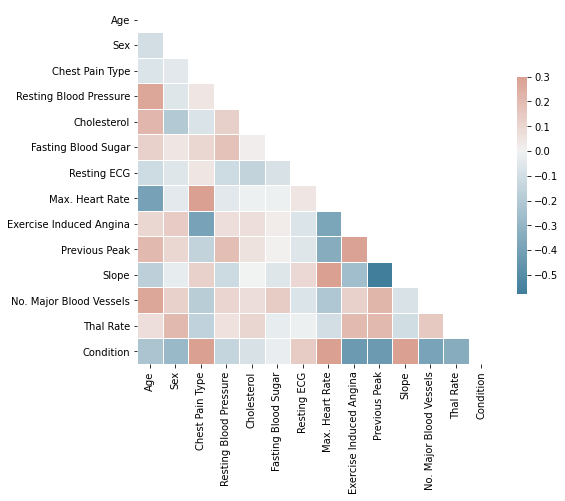

In [10]:
# Compute the correlation matrix
corr = dataset.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

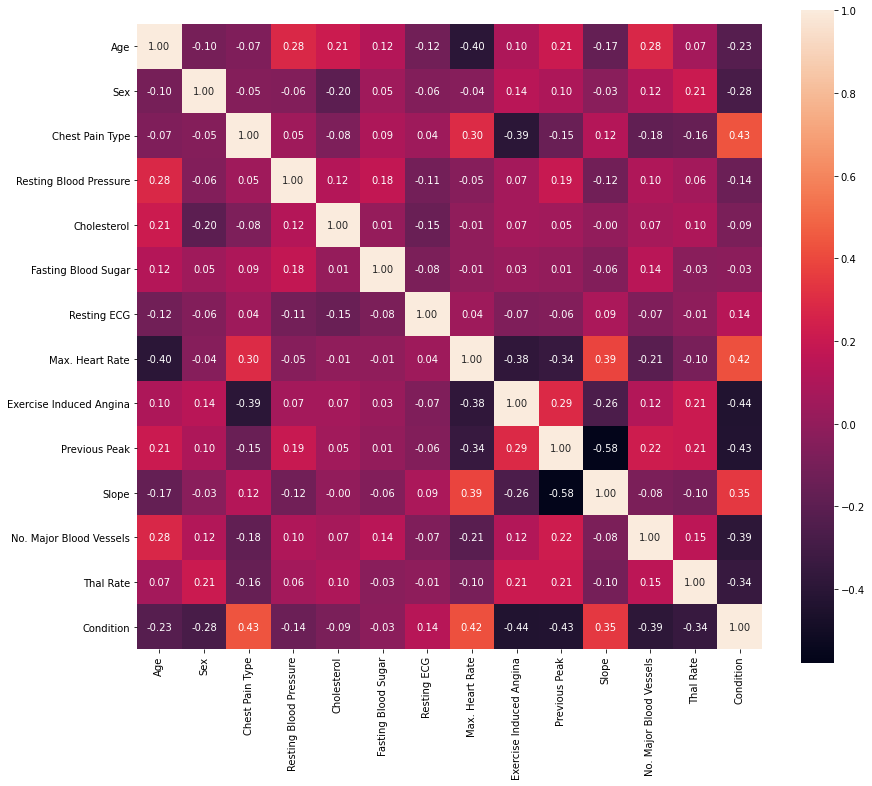

In [11]:
plt.figure(figsize=(14,12))
ax = sns.heatmap(corr, square=True, annot=True, fmt='.2f')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)          
plt.show()

📌 From the above correlation matrix, we can see that the correlation between features is less. <br>
📌 *Chest Pain Type* with *Condition* and *Max. Heart Rate* with *Condition* have high correlated features in our dataset; Correlation Coefficient of 0.43 and 0.42 respectively. <br>
📌 Our features have a lot of negative correlation coefficient indicating that two individual variables have a statistical relationship such that generally move in opposite directions from one another.

## **Pie Chart** <a id='3.2' ></a>

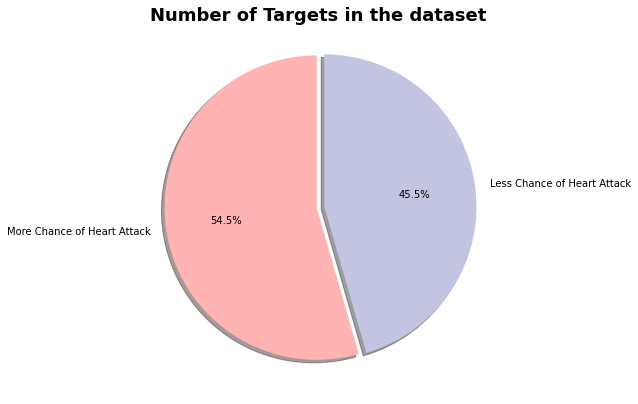

In [12]:
labels = ['More Chance of Heart Attack', 'Less Chance of Heart Attack']
sizes = dataset['Condition'].value_counts(sort = True)

colors = ["#ffb3b3","#C2C4E2"]
explode = (0.05,0) 
 
plt.figure(figsize=(7,7))
plt.suptitle("Number of Targets in the dataset",y=0.9, family='Sherif', size=18, weight='bold')
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90,)

plt.show()

📌 From the above pie chart, we can see that we have relatively more people who have more chances of having a Heart Attack. <br>
📌 We can also see that the our dataset is balanced.

## **Count Plot** <a id='3.3' ></a>

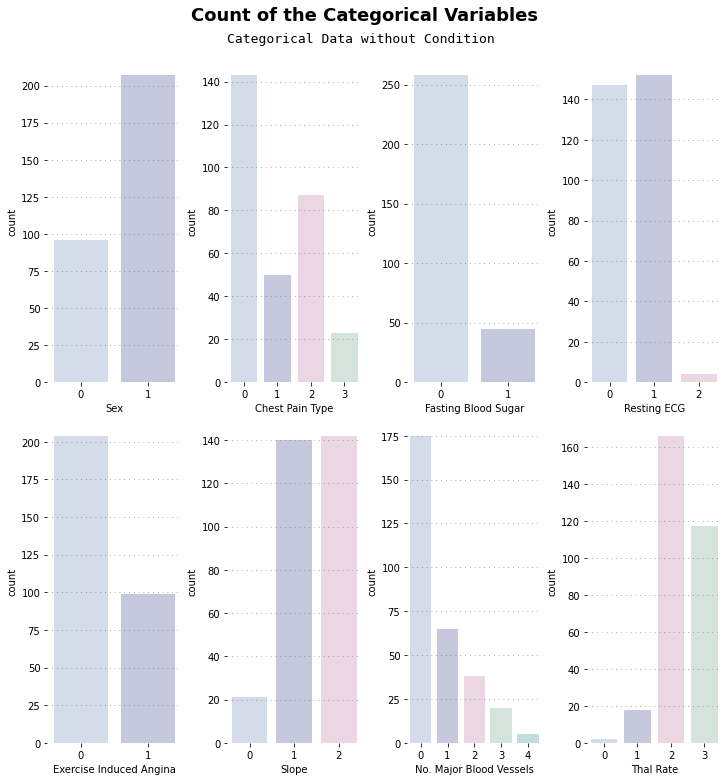

In [13]:
# Count Plot of Categorical Data w/o Condition
colors = ["#D0DBEE", "#C2C4E2", "#EED4E5", "#D1E6DC", "#BDE2E2"]
j=0
fig=plt.figure(figsize=(10,10),constrained_layout =True)
plt.suptitle("Count of the Categorical Variables",y=1.07, family='Sherif', size=18, weight='bold')
fig.text(0.31,1.02,"Categorical Data without Condition", size=13, fontweight='light', fontfamily='monospace')
for i in dataset[categorical]:
    ax=plt.subplot(241+j)
    ax.set_aspect('auto')
    ax.grid(color='gray', linestyle=':', axis='y', zorder=0, dashes=(1,5))
    ax=sns.countplot(data=dataset, x=i, palette=colors, alpha=1)
    for s in ['left','right','top','bottom']:
        ax.spines[s].set_visible(False)
    j=j+1

📌 From the above plots, we can see that we have different features which have a common and uncommon type of categories in our dataset. <br>
📌 But, It is not enough to tell us about the features. Let's compare all the categorical features with the target column of *Condition*.

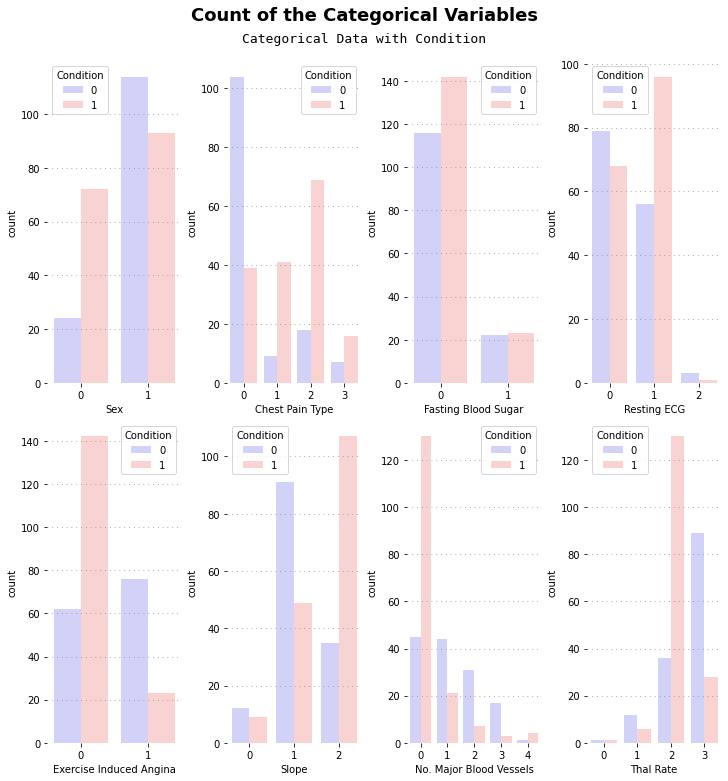

In [14]:
# Count Plot of Categorical Data with Condition
colors = ['#ccccff','#ffcccc']
j=0
fig=plt.figure(figsize=(10,10),constrained_layout =True)
plt.suptitle("Count of the Categorical Variables",y=1.07, family='Sherif', size=18, weight='bold')
fig.text(0.33,1.02,"Categorical Data with Condition", size=13, fontweight='light', fontfamily='monospace')
for i in dataset[categorical]:
    ax=plt.subplot(241+j)
    ax.set_aspect('auto')
    ax.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
    ax=sns.countplot(data=dataset, x=i, hue='Condition', palette=colors, alpha=1)
    for s in ['left','right','top','bottom']:
        ax.spines[s].set_visible(False)
    j=j+1

From above categorical plots we can see that: <br>
📌 In *Chest Pain*, Type 0 has the highest number of people who have less chance of suffering from a heart attack. <br>
📌 *Fasting Blood Sugar* and *Resting ECG* doesn't have much difference in their respective conditions. <br>
📌 In *Exercise-Induced Angina*, Type 0 has the highest number of people who are likely to suffer a heart attack. <br>
📌 *Slope* has Type 2, *No. of Major Blood Vessels* has Type 0 and *Thal Rate* has Type 2 which shows people who are likely to suffer from a heart attack.

## **Distribution Plot** <a id='3.4' ></a>

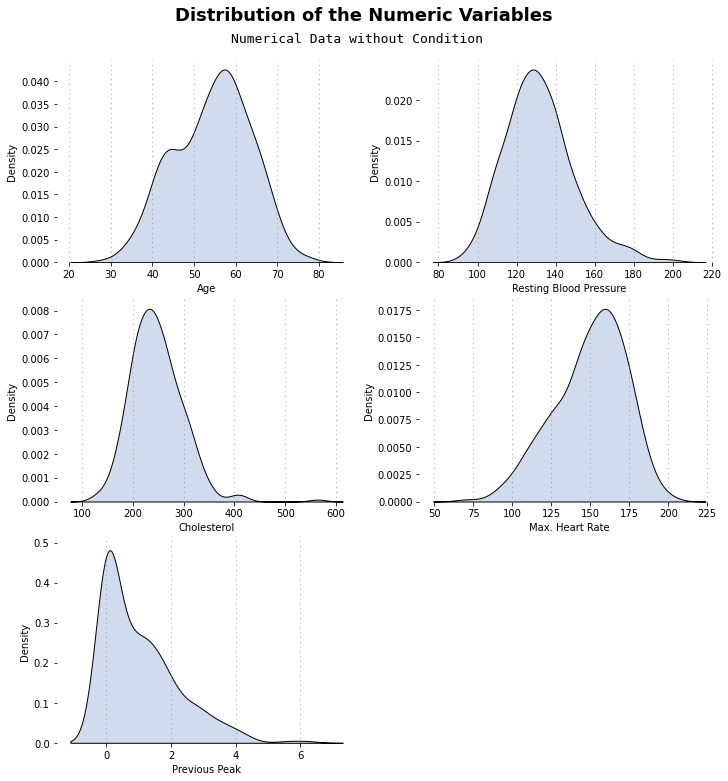

In [15]:
# Distribution Plot of Numerical Data w/o Condition
j=0
fig=plt.figure(figsize=(10,10),constrained_layout =True)
plt.suptitle("Distribution of the Numeric Variables",y=1.07, family='Sherif', size=18, weight='bold')
fig.text(0.315,1.02,"Numerical Data without Condition", size=13, fontweight='light', fontfamily='monospace')
for i in dataset[numerical]:
    ax=plt.subplot(321+j)
    ax.set_aspect('auto')
    ax.grid(color='gray', linestyle=':', axis='x', zorder=0,  dashes=(1,5))
    ax=sns.kdeplot(data=dataset, x=i, color='#D0DBEE', fill=True, edgecolor='black', alpha=1)
    for s in ['left','right','top','bottom']:
        ax.spines[s].set_visible(False)
    j=j+1

📌 From the above plots, we can see that the distribution density of different features them being skew. Let's also compare them with the target column of *Condition* to see how to perform.

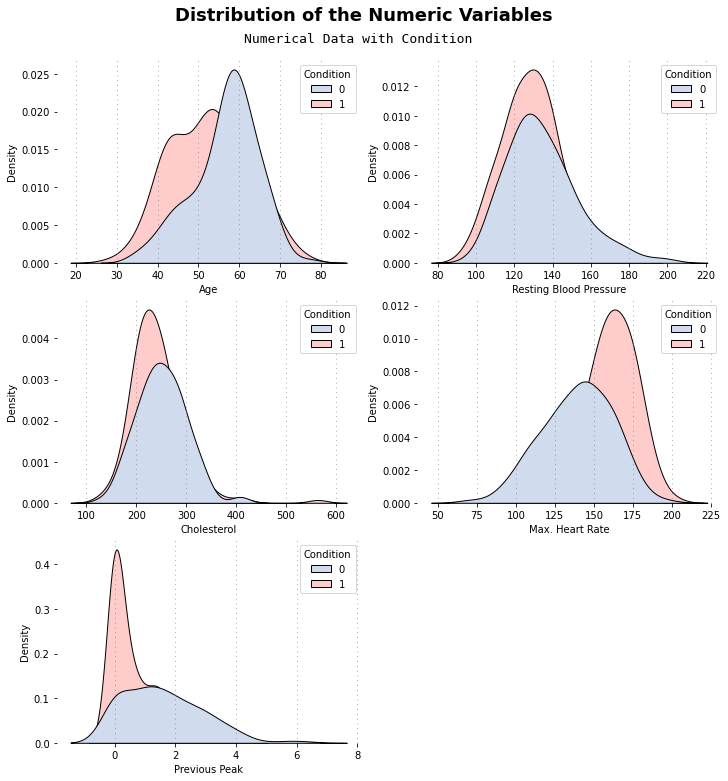

In [16]:
# Distribution Plot of Numerical Data with Condition
colors = ['#D0DBEE','#ffcccc']
j=0
fig=plt.figure(figsize=(10,10),constrained_layout =True)
plt.suptitle("Distribution of the Numeric Variables",y=1.07, family='Sherif', size=18, weight='bold')
fig.text(0.333,1.02,"Numerical Data with Condition", size=13, fontweight='light', fontfamily='monospace')
for i in dataset[numerical]:
    ax=plt.subplot(321+j)
    ax.set_aspect('auto')
    ax.grid(color='gray', linestyle=':', axis='x', zorder=0,  dashes=(1,5))
    ax=sns.kdeplot(data=dataset, x=i, hue='Condition', palette=colors, fill=True, edgecolor='black', alpha=1)
    for s in ['left','right','top','bottom']:
        ax.spines[s].set_visible(False)
    j=j+1

📌 From the above distribution plot, we can see that, *Age* and *Max. Heart Rate* is Negative Skewed and *Resting Blood Pressure*, *Cholesterol*, and *Previous Peak* are Positive Skewed.

## **Scatter Plot** <a id='3.5' ></a>

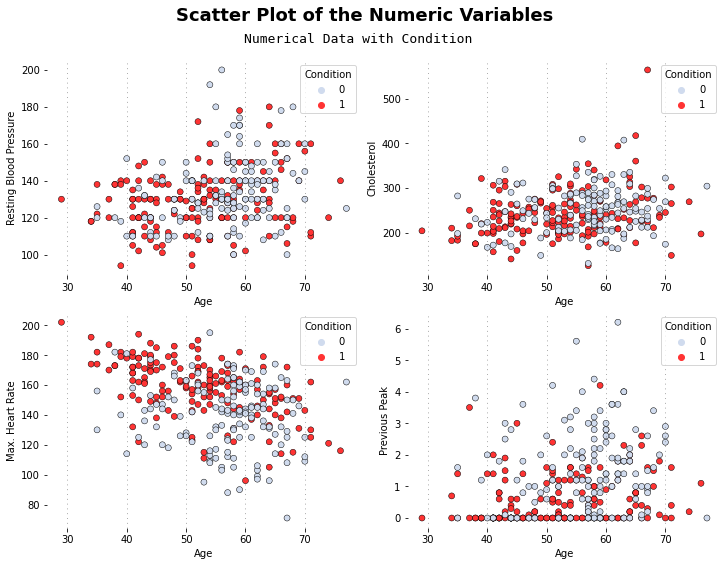

In [17]:
# Scatter Plot of Numerical Data with Condition
colors = ['#D0DBEE','#ff3333']
num_cols = ['Resting Blood Pressure','Cholesterol','Max. Heart Rate','Previous Peak']
j=0
fig=plt.figure(figsize=(10,10),constrained_layout =True)
plt.suptitle("Scatter Plot of the Numeric Variables",y=1.07, family='Sherif', size=18, weight='bold')
fig.text(0.333,1.02,"Numerical Data with Condition", size=13, fontweight='light', fontfamily='monospace')
for i in dataset[num_cols]:
    ax=plt.subplot(321+j)
    ax.set_aspect('auto')
    ax.grid(color='gray', linestyle=':', axis='x', zorder=0,  dashes=(1,5))
    ax=sns.scatterplot(data=dataset,x=dataset['Age'],y=i,hue=dataset['Condition'],ec='black',palette=colors)
    for s in ['left','right','top','bottom']:
        ax.spines[s].set_visible(False)
    j=j+1

📌 From the above plot, we can see that the relationship between *Age* and different numerical features in our dataset with *Condition*. We can also few Outliers in our plot.

## **Outliers** <a id='3.6' ></a>

📌 An outlier is an observation that lies an abnormal distance from other values in a random sample from a population.

### Detection <a id='3.6.1' ></a>

📌 In this notebook, we are using Boxen Plot to detect the outliers of each features in our dataset, where any point above or below the whiskers represent an outlier. This is also known as “Univariate method” as here we are using one variable outlier analysis.

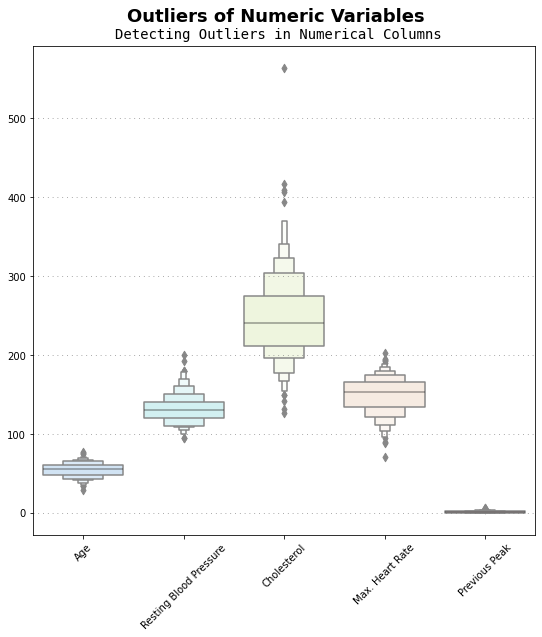

In [18]:
# Outliers Detection
colors = ['#CBE4F9','#CDF5F6','#EFF9DA','#F9EBDF','#F9D8D6']
plt.figure(figsize=(9,9))
plt.suptitle("Outliers of Numeric Variables",y=0.94, family='Sherif', size=18, weight='bold')
plt.text(-0.4, 1.64, 'Detecting Outliers in Numerical Columns', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes,size=14,fontweight='light', fontfamily='monospace')
sns.boxenplot(data = dataset[numerical],palette = colors)
plt.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
plt.xticks(rotation=45)
plt.show()

### Removal <a id='3.6.2' ></a>

📌 After detecting, we are using Median Imputation to take care of outliers. In this technique, we replace the extreme values with median values. <br>
📌 It is represented by the formula IQR = Q3 − Q1. The lines of code below calculate and print the interquartile range for each of the variables in the dataset. <br>
📌 It is advised to not use mean values as they are affected by outliers.

In [19]:
# Removing Outliers
for i in dataset[numerical]:
    q1 = dataset[i].quantile(0.25)
    q3 = dataset[i].quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    med = np.median(dataset[i])
    for j in dataset[i]:
        if j > Upper_tail or j < Lower_tail:
            dataset[i] = dataset[i].replace(j, med)

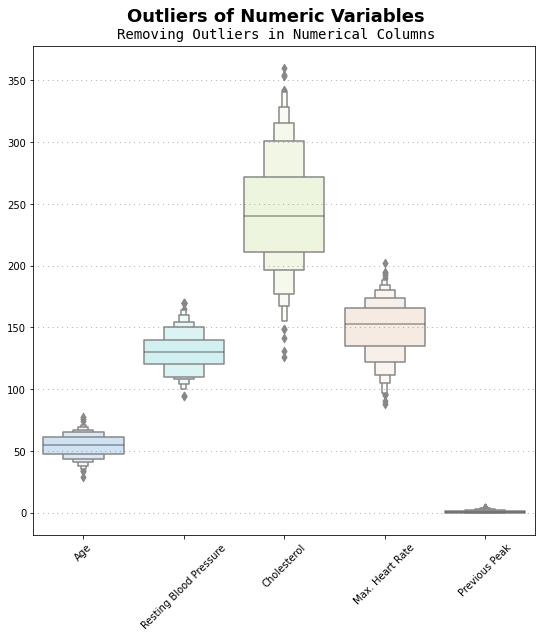

In [20]:
colors = ['#CBE4F9','#CDF5F6','#EFF9DA','#F9EBDF','#F9D8D6']
plt.figure(figsize=(9,9))
plt.suptitle("Outliers of Numeric Variables",y=0.94, family='Sherif', size=18, weight='bold')
plt.text(-0.405, 1.64, 'Removing Outliers in Numerical Columns', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes,size=14,fontweight='light', fontfamily='monospace')
sns.boxenplot(data = dataset[numerical],palette = colors)
plt.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
plt.xticks(rotation=45)
plt.show()

## **Pair Plot** <a id='3.7' ></a>

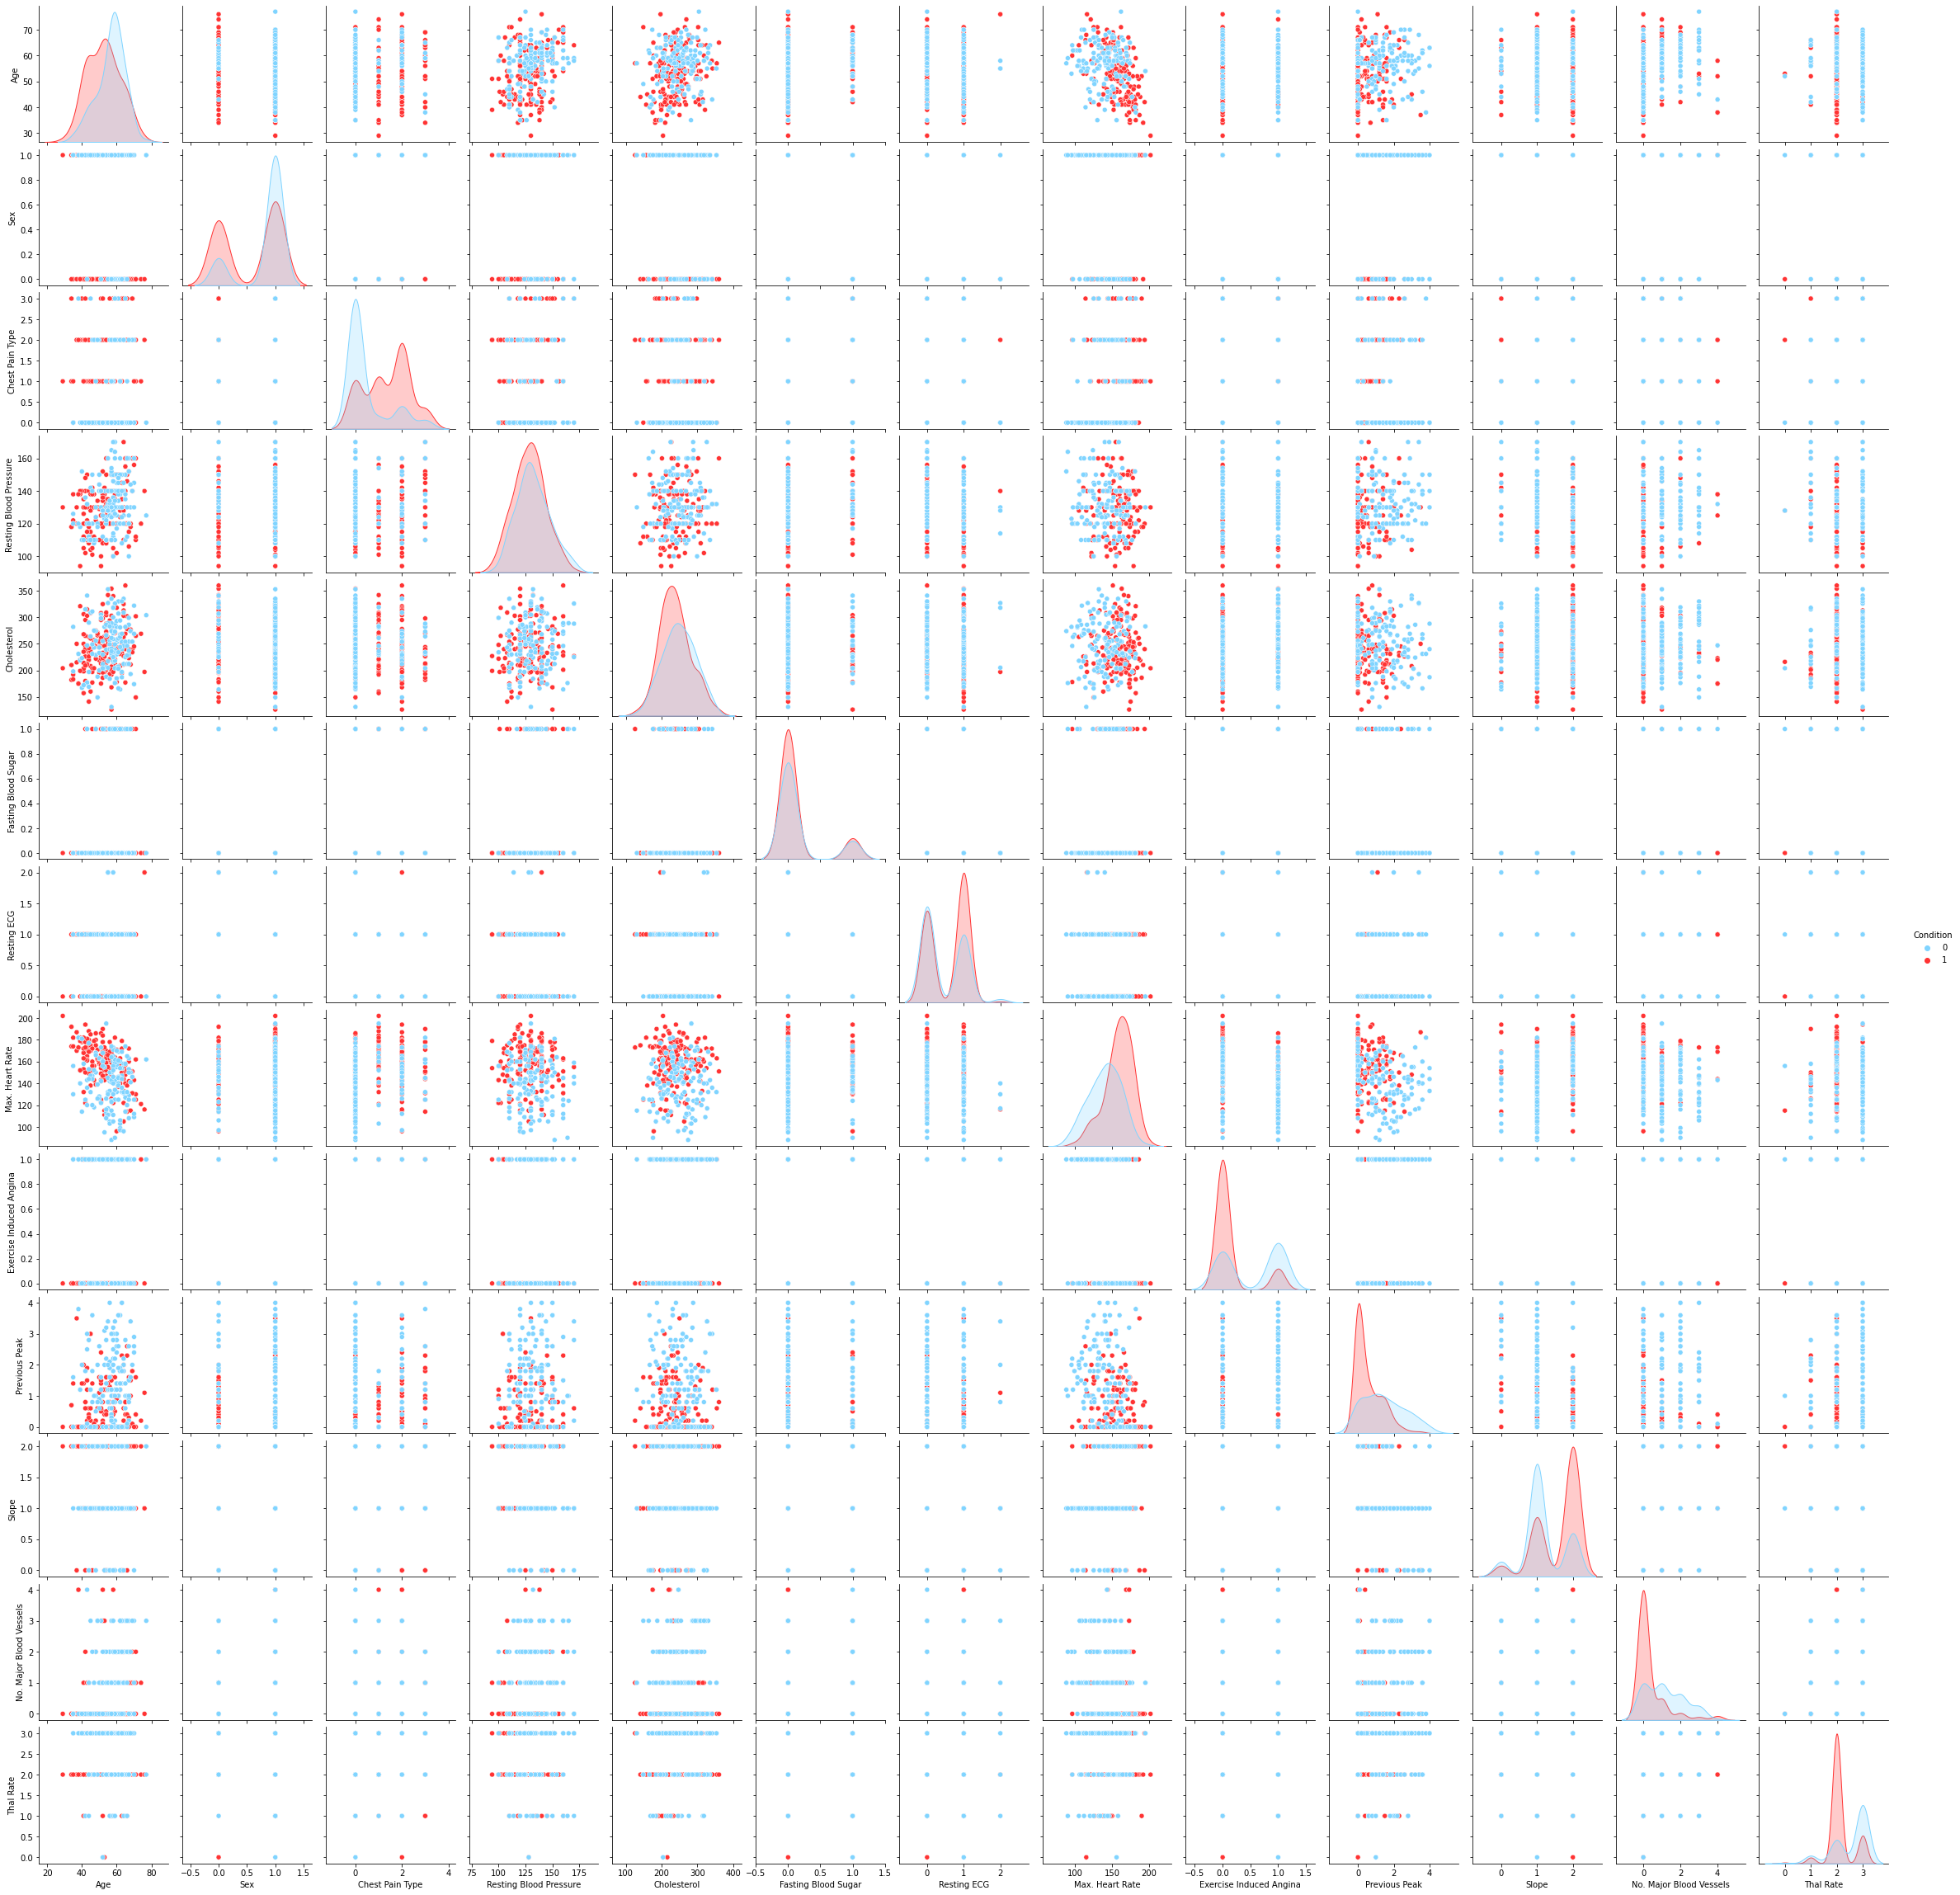

In [21]:
colors = ['#80d4ff','#ff3333']
sns.pairplot(data=dataset,hue='Condition',diag_kind='kde',palette=colors)
plt.show()

📌 The above graphs produce a matrix of relationships between each variable in your data for an instant examination of our data. We can see that the outliers in our dataset have been taken care of.

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:LightSlateGray;
           font-size:150%;
           text-align:center;
            letter-spacing:0.5px"> <a id='4'></a>
    
    Data Preprocessing
</div>

In [22]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [23]:
# Splitting Data into Train and Test Set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 0)

In [24]:
print("Number transactions x_train dataset: ", x_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions x_test dataset: ", x_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions x_train dataset:  (242, 13)
Number transactions y_train dataset:  (242,)
Number transactions x_test dataset:  (61, 13)
Number transactions y_test dataset:  (61,)


In [25]:
# Feature Scaling with StandardScaler
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:LightSlateGray;
           font-size:150%;
           text-align:center;
            letter-spacing:0.5px"> <a id='5'></a>
    
    Models
</div>

📌 **True Positives (TP)** - These are the correctly predicted positive values which means that the value of actual class is yes and the value of predicted class is also yes. <br>
📌 **True Negatives (TN)** - These are the correctly predicted negative values which means that the value of actual class is no and value of predicted class is also no. <br>
📌 **False Positives (FP)** – When actual class is no and predicted class is yes. <br>
📌 **False Negatives (FN)** – When actual class is yes but predicted class in no. <br>
📌 **Accuracy** - Accuracy is the most intuitive performance measure and it is simply a ratio of correctly predicted observation to the total observations. `Accuracy = TP+TN/TP+FP+FN+TN` <br>
📌 **Precision** - Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. `Precision = TP/TP+FP` <br>
📌 **Recall (Sensitivity)** - Recall is the ratio of correctly predicted positive observations to the all observations in actual class - yes. `Recall = TP/TP+FN` <br>
📌 **F1 score** - F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account.  `F1 Score = 2(Recall Precision) / (Recall + Precision)` <br>
📌 **Support** - Support is the number of actual occurrences of the class in the specified dataset. Support doesn’t change between models but instead diagnoses the evaluation process.

## **Logistic Regression** <a id='5.1' ></a>

📌 *Logistic Regression assumes a Gaussian distribution for the numeric input variables and can model binary classification problems. You can construct a logistic regression model using the LogisticRegression class.*

              precision    recall  f1-score   support

           0       0.88      0.78      0.82        27
           1       0.84      0.91      0.87        34

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61

ROC AUC score: 0.9117647058823529
Accuracy Score:  0.8524590163934426


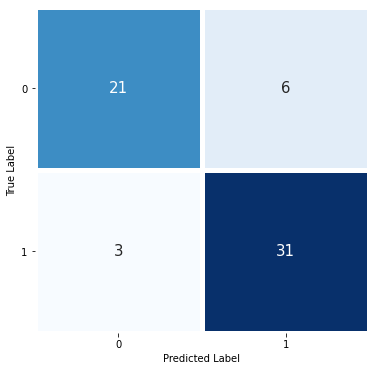

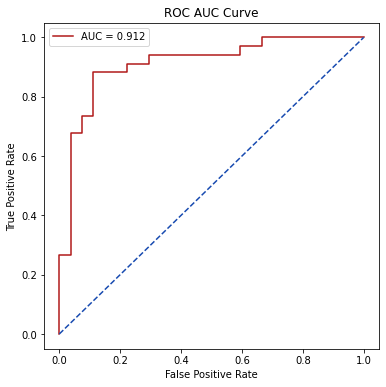

<Figure size 432x432 with 0 Axes>

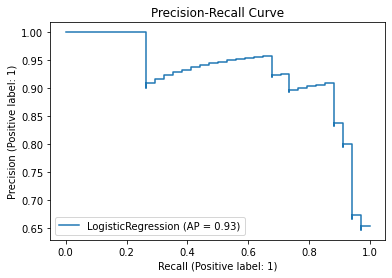

In [26]:
#Fitting Logistic Regression Model
classifier = LogisticRegression(random_state= 0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
y_prob = classifier.predict_proba(x_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (6, 6))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.yticks(rotation = 0)
plt.show()

# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.figure(figsize = (6, 6))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC AUC Curve')
plt.legend()
plt.show()

#Precision Recall Curve
plt.figure(figsize = (6, 6))
average_precision = average_precision_score(y_test, y_prob)
disp = plot_precision_recall_curve(classifier, x_test, y_test)
plt.title('Precision-Recall Curve')
plt.show()

## **Passive Aggressive Classifier** <a id='5.2' ></a>

📌 *Like MultinomialNB, this classifier is suitable for discrete data. The difference is that while MultinomialNB works with occurrence counts, BernoulliNB is designed for binary/boolean features. The Passive-Aggressive algorithms are a family of Machine learning algorithms that are not very well known by beginners and even intermediate Machine Learning enthusiasts. However, they can be very useful and efficient for certain applications.*

              precision    recall  f1-score   support

           0       0.85      0.63      0.72        27
           1       0.76      0.91      0.83        34

    accuracy                           0.79        61
   macro avg       0.80      0.77      0.78        61
weighted avg       0.80      0.79      0.78        61

ROC AUC score: 0.8649237472766884
Accuracy Score:  0.7868852459016393


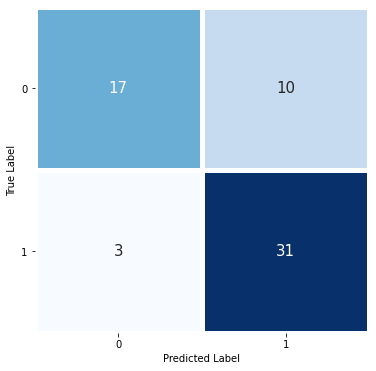

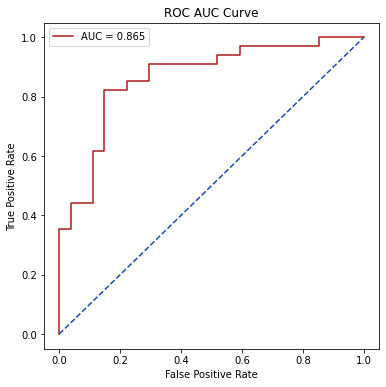

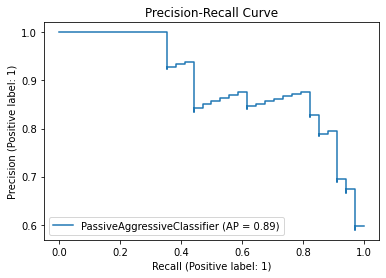

In [27]:
#Fitting PassiveAggressiveClassifier Model
classifier = PassiveAggressiveClassifier()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
y_prob = classifier._predict_proba_lr(x_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (6, 6))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.yticks(rotation = 0)
plt.show()

# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.figure(figsize = (6, 6))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC AUC Curve')
plt.legend()
plt.show()

#Precision Recall Curve
average_precision = average_precision_score(y_test, y_prob)
disp = plot_precision_recall_curve(classifier, x_test, y_test)
plt.title('Precision-Recall Curve')
plt.show()

## **Ridge Classifier** <a id='5.3' ></a>

📌 *Classifier using Ridge regression. This classifier first converts the target values into {-1, 1} and then treats the problem as a regression task (multi-output regression in the multiclass case).*

              precision    recall  f1-score   support

           0       0.88      0.78      0.82        27
           1       0.84      0.91      0.87        34

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61

ROC AUC score: 0.900871459694989
Accuracy Score:  0.8524590163934426


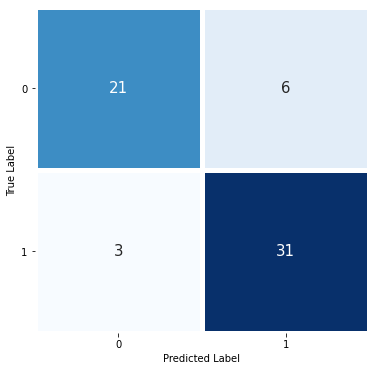

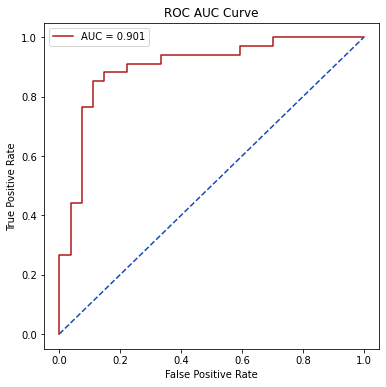

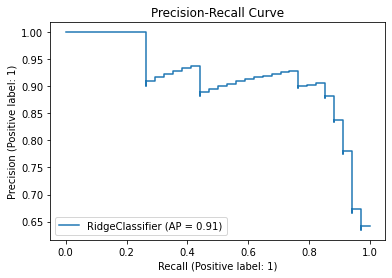

In [28]:
#Fitting RidgeClassifier Model
classifier = RidgeClassifier()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
y_prob = classifier._predict_proba_lr(x_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (6, 6))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.yticks(rotation = 0)
plt.show()

# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.figure(figsize = (6, 6))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC AUC Curve')
plt.legend()
plt.show()

#Precision Recall Curve
average_precision = average_precision_score(y_test, y_prob)
disp = plot_precision_recall_curve(classifier, x_test, y_test)
plt.title('Precision-Recall Curve')
plt.show()

## **K-Nearest Neighbors** <a id='5.4' ></a>

📌 *The k-nearest neighbors (KNN) algorithm is a simple, easy-to-implement supervised machine learning algorithm that can be used to solve both classification and regression problems*

              precision    recall  f1-score   support

           0       0.81      0.78      0.79        27
           1       0.83      0.85      0.84        34

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61

ROC AUC score: 0.9106753812636165
Accuracy Score:  0.819672131147541


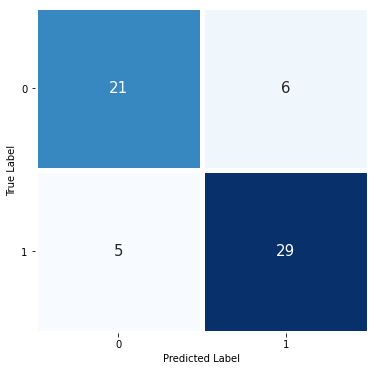

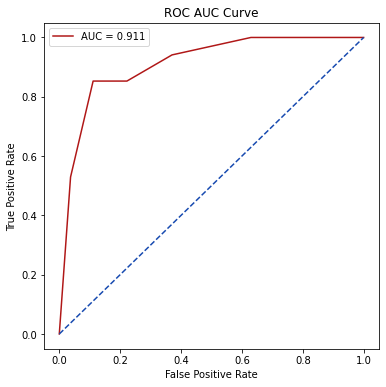

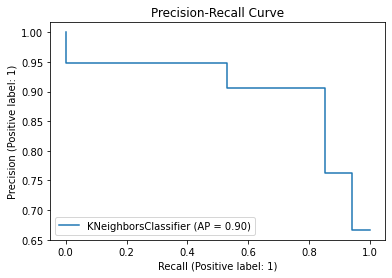

In [29]:
#Fitting KNeighborsClassifier Model
classifier = KNeighborsClassifier()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
y_prob = classifier.predict_proba(x_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (6, 6))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.yticks(rotation = 0)
plt.show()

# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.figure(figsize = (6, 6))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC AUC Curve')
plt.legend()
plt.show()

#Precision Recall Curve
average_precision = average_precision_score(y_test, y_prob)
disp = plot_precision_recall_curve(classifier, x_test, y_test)
plt.title('Precision-Recall Curve')
plt.show()

## **Radius Neighbors Classifier** <a id='5.5' ></a>

📌 Classifier implementing a vote among neighbors within a given radius

              precision    recall  f1-score   support

           0       1.00      0.26      0.41        27
           1       0.63      1.00      0.77        34

    accuracy                           0.67        61
   macro avg       0.81      0.63      0.59        61
weighted avg       0.79      0.67      0.61        61

ROC AUC score: 0.9438997821350763
Accuracy Score:  0.6721311475409836


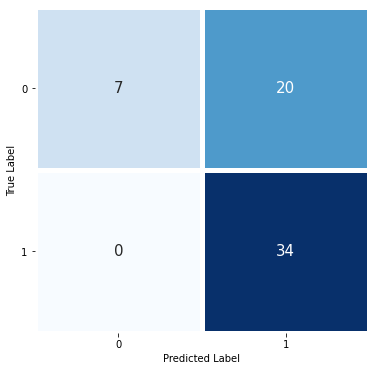

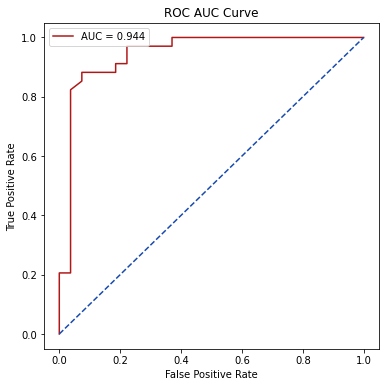

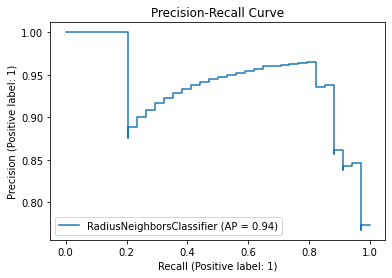

In [30]:
#Fitting RadiusNeighborsClassifier Model
classifier = RadiusNeighborsClassifier(outlier_label=1,radius=6)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
y_prob = classifier.predict_proba(x_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (6, 6))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.yticks(rotation = 0)
plt.show()

# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.figure(figsize = (6, 6))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC AUC Curve')
plt.legend()
plt.show()

#Precision Recall Curve
average_precision = average_precision_score(y_test, y_prob)
disp = plot_precision_recall_curve(classifier, x_test, y_test)
plt.title('Precision-Recall Curve')
plt.show()

## **GaussianNB** <a id='5.6' ></a>

📌 *A Gaussian Naive Bayes algorithm is a special type of NB algorithm. It's specifically used when the features have continuous values. It's also assumed that all the features are following a gaussian distribution i.e, normal distribution.*

              precision    recall  f1-score   support

           0       0.87      0.74      0.80        27
           1       0.82      0.91      0.86        34

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.83        61

ROC AUC score: 0.9095860566448801
Accuracy Score:  0.8360655737704918


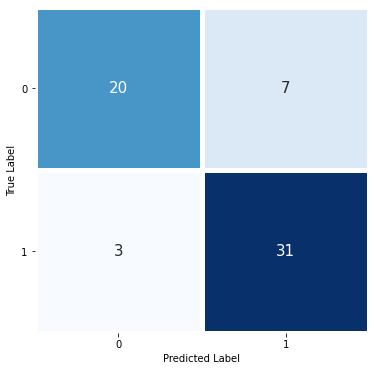

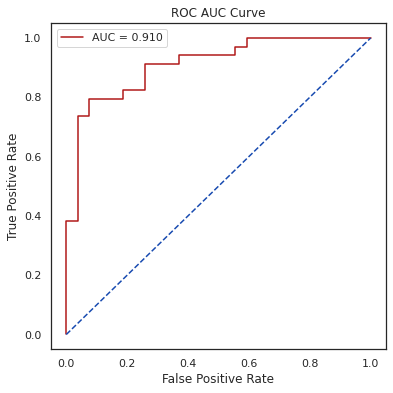

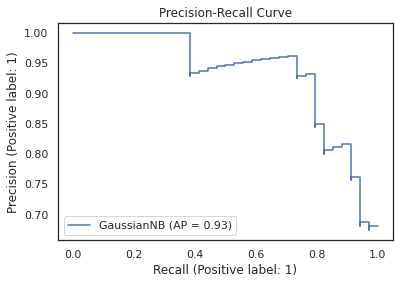

In [31]:
#Fitting GaussianNB Model
classifier = GaussianNB()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
y_prob = classifier.predict_proba(x_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (6, 6))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.yticks(rotation = 0)
plt.show()

# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (6, 6))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC AUC Curve')
plt.legend()
plt.show()

#Precision Recall Curve
average_precision = average_precision_score(y_test, y_prob)
disp = plot_precision_recall_curve(classifier, x_test, y_test)
plt.title('Precision-Recall Curve')
plt.show()

## **BernoulliNB** <a id='5.7' ></a>

📌 *Like MultinomialNB, this classifier is suitable for discrete data. The difference is that while MultinomialNB works with occurrence counts, BernoulliNB is designed for binary/boolean features.*

              precision    recall  f1-score   support

           0       0.82      0.85      0.84        27
           1       0.88      0.85      0.87        34

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

ROC AUC score: 0.9379084967320261
Accuracy Score:  0.8524590163934426


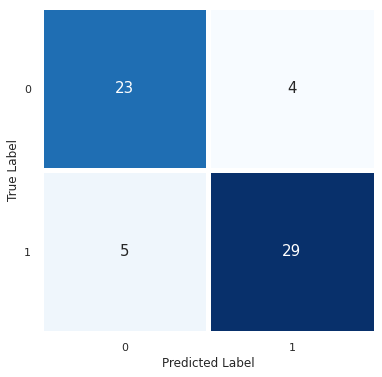

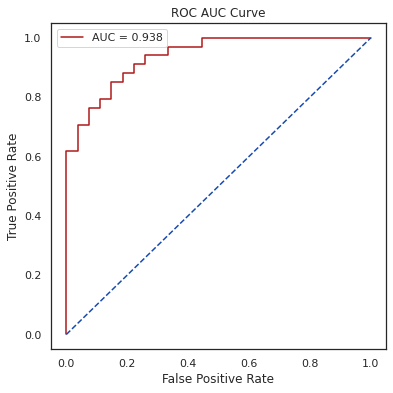

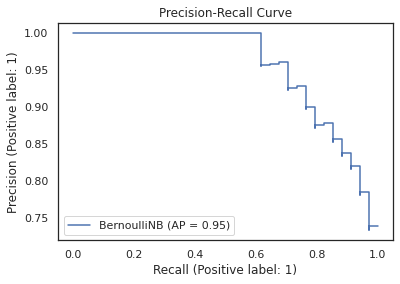

In [32]:
#Fitting BernoulliNB Model
classifier = BernoulliNB()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
y_prob = classifier.predict_proba(x_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (6, 6))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.yticks(rotation = 0)
plt.show()

# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (6, 6))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC AUC Curve')
plt.legend()
plt.show()

#Precision Recall Curve
average_precision = average_precision_score(y_test, y_prob)
disp = plot_precision_recall_curve(classifier, x_test, y_test)
plt.title('Precision-Recall Curve')
plt.show()

## **SVM** <a id='5.8' ></a>

📌 *Support Vector Machines (or SVM) seek a line that best separates two classes. Those data instances that are closest to the line that best separates the classes are called support vectors and influence where the line is placed. SVM has been extended to support multiple classes Of particular importance is the use of different kernel functions via the kernel parameter .A powerful Radial Basis Function is used by default. You can construct an SVM model using the SVC class.*

              precision    recall  f1-score   support

           0       0.91      0.74      0.82        27
           1       0.82      0.94      0.88        34

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.86      0.85      0.85        61

ROC AUC score: 0.9324618736383442
Accuracy Score:  0.8524590163934426


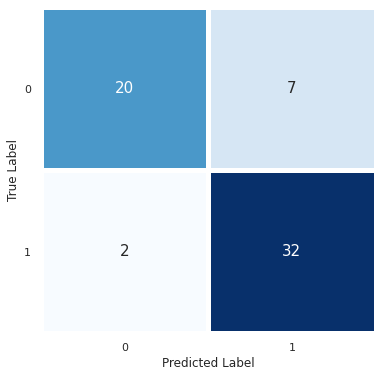

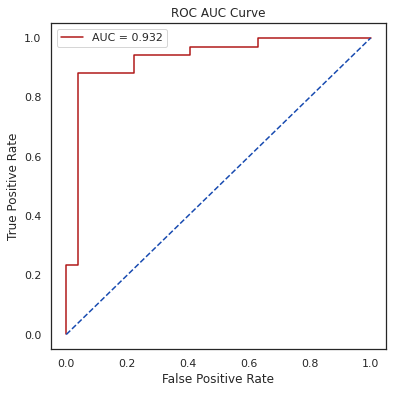

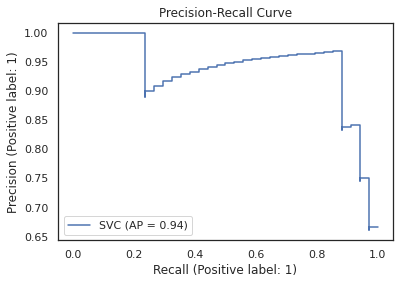

In [33]:
#Fitting SVC Model
classifier = SVC(probability=True)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
y_prob = classifier.predict_proba(x_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (6, 6))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.yticks(rotation = 0)
plt.show()

# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (6, 6))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC AUC Curve')
plt.legend()
plt.show()

#Precision Recall Curve
average_precision = average_precision_score(y_test, y_prob)
disp = plot_precision_recall_curve(classifier, x_test, y_test)
plt.title('Precision-Recall Curve')
plt.show()

## **Nu-SVC** <a id='5.9' ></a>

📌 *Similar to SVC but uses a parameter to control the number of support vectors.*

              precision    recall  f1-score   support

           0       0.82      0.85      0.84        27
           1       0.88      0.85      0.87        34

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

ROC AUC score: 0.9215686274509803
Accuracy Score:  0.8524590163934426


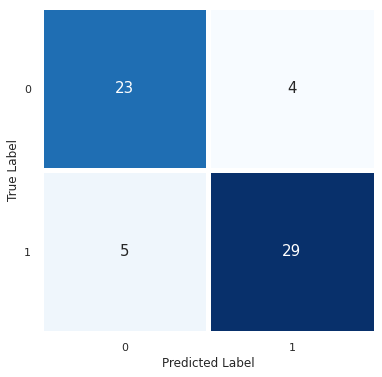

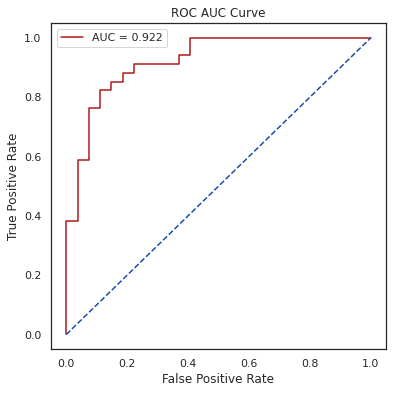

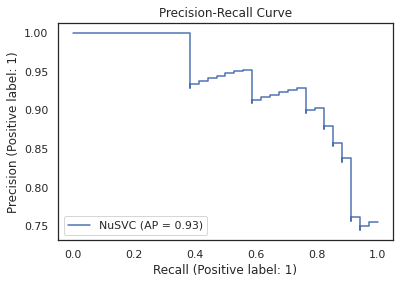

In [34]:
#Fitting Nu-SVC Model
classifier = NuSVC(nu=0.3,probability=True)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
y_prob = classifier.predict_proba(x_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (6, 6))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.yticks(rotation = 0)
plt.show()

# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (6, 6))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC AUC Curve')
plt.legend()
plt.show()

#Precision Recall Curve
average_precision = average_precision_score(y_test, y_prob)
disp = plot_precision_recall_curve(classifier, x_test, y_test)
plt.title('Precision-Recall Curve')
plt.show()

## **Linear SVC** <a id='5.10' ></a>

📌 *Similar to SVC with parameter kernel=’linear’, but implemented in terms of liblinear rather than libsvm, so it has more flexibility in the choice of penalties and loss functions and should scale better to large numbers of samples.*

              precision    recall  f1-score   support

           0       0.88      0.78      0.82        27
           1       0.84      0.91      0.87        34

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61

ROC AUC score: 0.9084967320261438
Accuracy Score:  0.8524590163934426


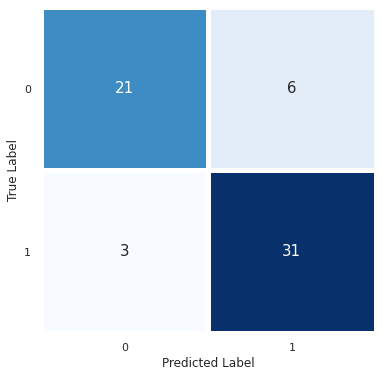

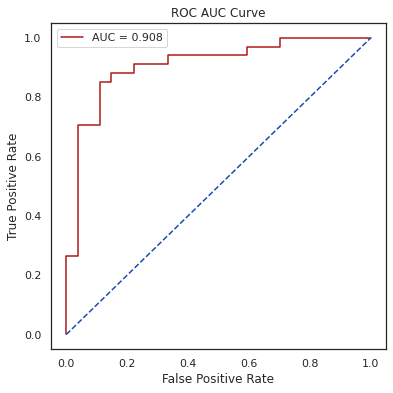

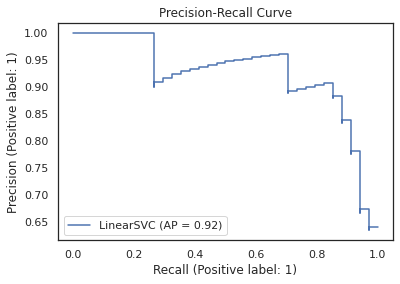

In [35]:
#Fitting LinearSVC Model
classifier = LinearSVC()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
y_prob = classifier._predict_proba_lr(x_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (6, 6))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.yticks(rotation = 0)
plt.show()

# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (6, 6))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC AUC Curve')
plt.legend()
plt.show()

#Precision Recall Curve
average_precision = average_precision_score(y_test, y_prob)
disp = plot_precision_recall_curve(classifier, x_test, y_test)
plt.title('Precision-Recall Curve')
plt.show()

## **Decision Tree** <a id='5.11' ></a>

📌 *Classification and Regression Trees (CART or just decision trees) construct a binary tree from the training data. Split points are chosen greedily by evaluating each attribute and each value of each attribute in the training data in order to minimize a cost function (like the Gini index). You can construct a CART model using the DecisionTreeClassifier class*

              precision    recall  f1-score   support

           0       0.77      0.85      0.81        27
           1       0.87      0.79      0.83        34

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61

ROC AUC score: 0.8229847494553376
Accuracy Score:  0.819672131147541


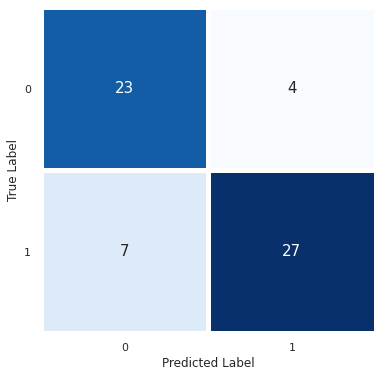

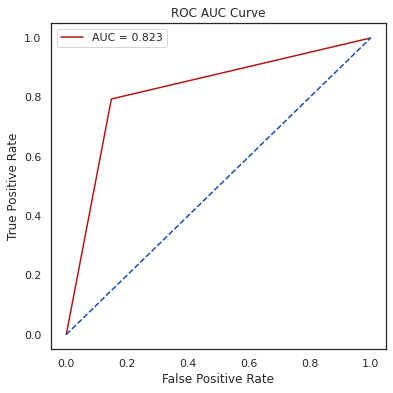

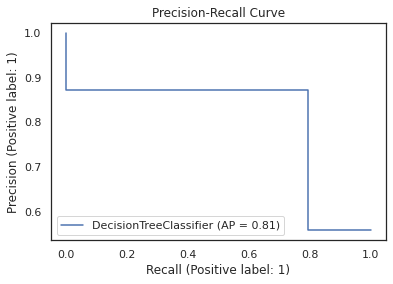

In [36]:
#Fitting DecisionTreeClassifier Model
classifier = DecisionTreeClassifier(criterion= 'gini',random_state= 0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
y_prob = classifier.predict_proba(x_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (6, 6))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.yticks(rotation = 0)
plt.show()

# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (6, 6))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC AUC Curve')
plt.legend()
plt.show()

#Precision Recall Curve
average_precision = average_precision_score(y_test, y_prob)
disp = plot_precision_recall_curve(classifier, x_test, y_test)
plt.title('Precision-Recall Curve')
plt.show()

## **Random Forest** <a id='5.12' ></a>

📌 *Random Forests is an extension of bagged decision trees. Samples of the training dataset are taken with replacement, but the trees are constructed in a way that reduces the correlation between individual classifiers. Specifically, rather than greedily choosing the best split point in the construction of each tree, only a random subset of features are considered for each split. You can construct a Random Forest model for classification using the RandomForestClassifier class.*

              precision    recall  f1-score   support

           0       0.88      0.81      0.85        27
           1       0.86      0.91      0.89        34

    accuracy                           0.87        61
   macro avg       0.87      0.86      0.87        61
weighted avg       0.87      0.87      0.87        61

ROC AUC score: 0.9335511982570806
Accuracy Score:  0.8688524590163934


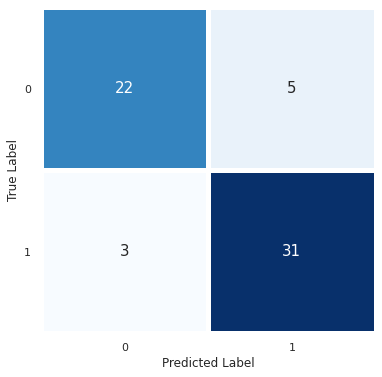

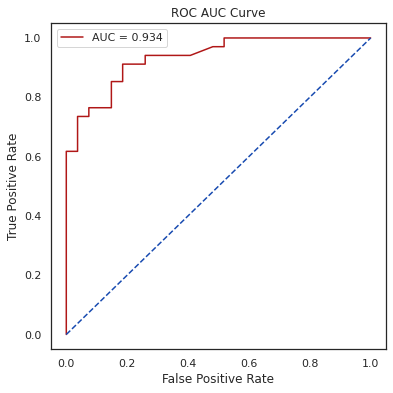

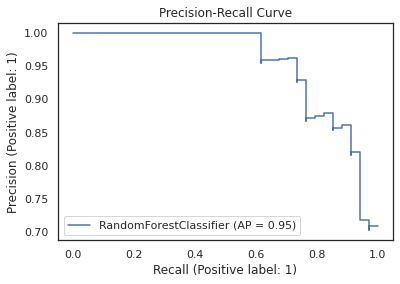

In [37]:
#Fitting RandomForestClassifier Model
classifier = RandomForestClassifier(criterion= 'entropy', n_estimators= 200,random_state= 0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
y_prob = classifier.predict_proba(x_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (6, 6))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.yticks(rotation = 0)
plt.show()

# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (6, 6))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC AUC Curve')
plt.legend()
plt.show()

#Precision Recall Curve
average_precision = average_precision_score(y_test, y_prob)
disp = plot_precision_recall_curve(classifier, x_test, y_test)
plt.title('Precision-Recall Curve')
plt.show()

## **Extra Trees** <a id='5.13' ></a>

📌 *Extra Trees are another modification of bagging where random trees are constructed from samples of the training dataset. You can construct an Extra Trees model for classification using the ExtraTreesClassifier class.*

              precision    recall  f1-score   support

           0       0.82      0.85      0.84        27
           1       0.88      0.85      0.87        34

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

ROC AUC score: 0.9417211328976034
Accuracy Score:  0.8524590163934426


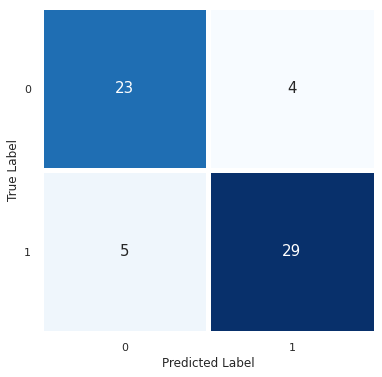

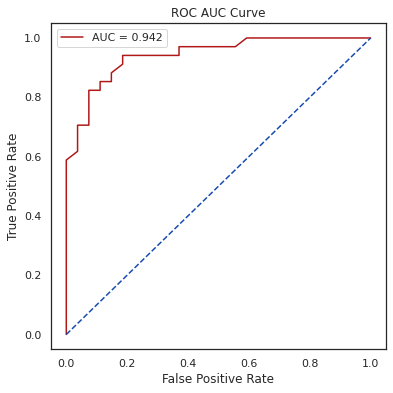

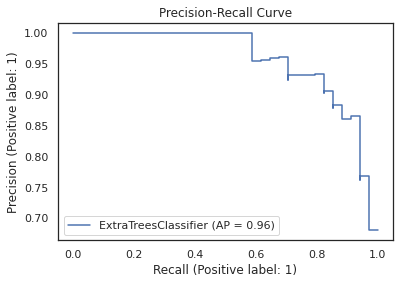

In [38]:
#Fitting ExtraTreesClassifier Model
classifier = ExtraTreesClassifier(criterion= 'gini',n_estimators= 100,random_state= 0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
y_prob = classifier.predict_proba(x_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (6, 6))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.yticks(rotation = 0)
plt.show()

# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (6, 6))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC AUC Curve')
plt.legend()
plt.show()

#Precision Recall Curve
average_precision = average_precision_score(y_test, y_prob)
disp = plot_precision_recall_curve(classifier, x_test, y_test)
plt.title('Precision-Recall Curve')
plt.show()

## **AdaBoost** <a id='5.14' ></a>

📌 *AdaBoost was perhaps the first successful boosting ensemble algorithm. It generally works by weighting instances in the dataset by how easy or difficult they are to classify, allowing the algorithm to pay or less attention to them in the construction of subsequent models. You can construct an AdaBoost model for classification using the AdaBoostClassifier class*

              precision    recall  f1-score   support

           0       0.85      0.81      0.83        27
           1       0.86      0.88      0.87        34

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

ROC AUC score: 0.9183006535947712
Accuracy Score:  0.8524590163934426


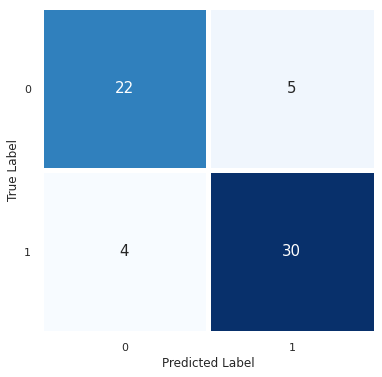

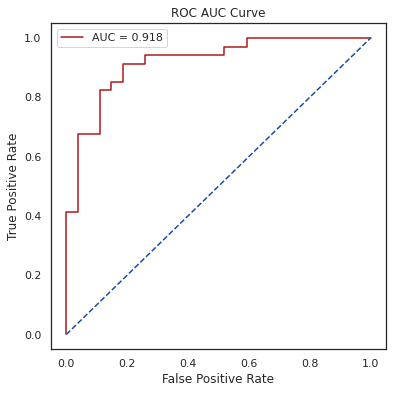

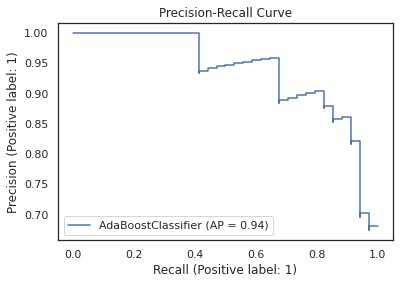

In [39]:
#Fitting AdaBoostClassifier Model
classifier = AdaBoostClassifier(algorithm= 'SAMME', learning_rate= 0.1, n_estimators= 100,random_state= 0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
y_prob = classifier.predict_proba(x_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (6, 6))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.yticks(rotation = 0)
plt.show()

# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (6, 6))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC AUC Curve')
plt.legend()
plt.show()

#Precision Recall Curve
average_precision = average_precision_score(y_test, y_prob)
disp = plot_precision_recall_curve(classifier, x_test, y_test)
plt.title('Precision-Recall Curve')
plt.show()

## **Gradient Boosting** <a id='5.15' ></a>

📌 *Stochastic Gradient Boosting (also called Gradient Boosting Machines) are one of the most sophisticated ensemble techniques. It is also a technique that is proving to be perhaps one of the best techniques available for improving performance via ensembles. You can construct a Gradient Boosting model for classification using the GradientBoostingClassifier class*

              precision    recall  f1-score   support

           0       0.72      0.78      0.75        27
           1       0.81      0.76      0.79        34

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61

ROC AUC score: 0.9074074074074074
Accuracy Score:  0.7704918032786885


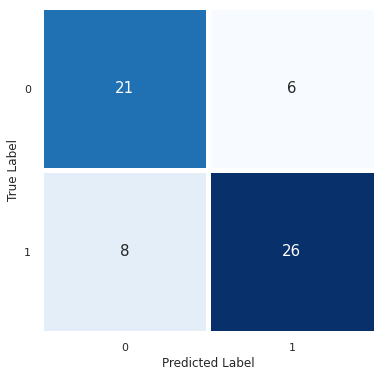

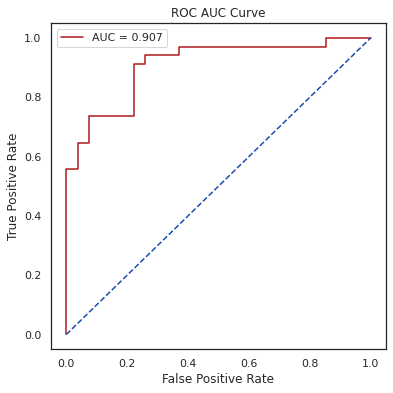

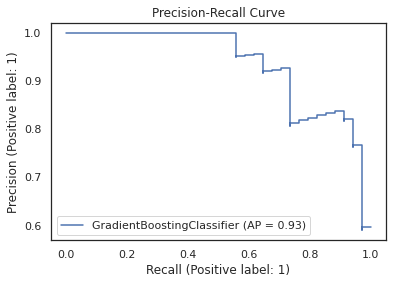

In [40]:
#Fitting GradientBoostingClassifier Model
classifier = GradientBoostingClassifier(criterion= 'mse', learning_rate= 0.1, loss= 'exponential', n_estimators= 100,random_state= 0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
y_prob = classifier.predict_proba(x_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (6, 6))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.yticks(rotation = 0)
plt.show()

# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (6, 6))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC AUC Curve')
plt.legend()
plt.show()

#Precision Recall Curve
average_precision = average_precision_score(y_test, y_prob)
disp = plot_precision_recall_curve(classifier, x_test, y_test)
plt.title('Precision-Recall Curve')
plt.show()

## **Bagging Classifier** <a id='5.16' ></a>

📌 *A Bagging classifier is an ensemble meta-estimator that fits base classifiers each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction. Such a meta-estimator can typically be used as a way to reduce the variance of a black-box estimator (e.g., a decision tree), by introducing randomization into its construction procedure and then making an ensemble out of it.*

              precision    recall  f1-score   support

           0       0.76      0.81      0.79        27
           1       0.84      0.79      0.82        34

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61

ROC AUC score: 0.9264705882352942
Accuracy Score:  0.8032786885245902


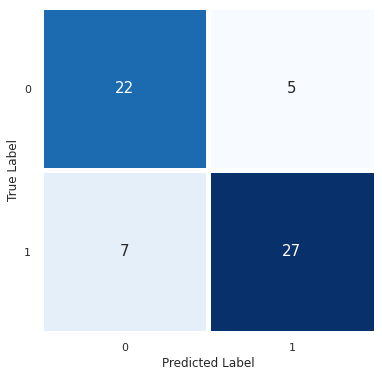

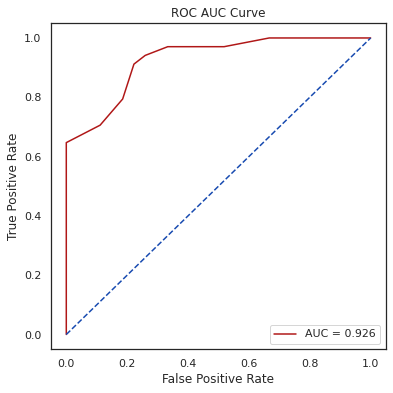

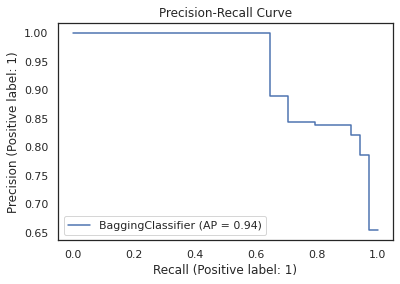

In [41]:
#Fitting BaggingClassifier Model
classifier = BaggingClassifier(random_state= 0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
y_prob = classifier.predict_proba(x_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (6, 6))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.yticks(rotation = 0)
plt.show()

# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (6, 6))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC AUC Curve')
plt.legend()
plt.show()

#Precision Recall Curve
average_precision = average_precision_score(y_test, y_prob)
disp = plot_precision_recall_curve(classifier, x_test, y_test)
plt.title('Precision-Recall Curve')
plt.show()

## **XGBoost** <a id='5.17' ></a>

📌 *XGBoost stands for Extreme Gradient Boosting, it is a performant machine learning library based on the paper Greedy Function Approximation: A Gradient Boosting Machine, by Friedman. XGBoost implements a Gradient Boosting algorithm based on decision trees.*

              precision    recall  f1-score   support

           0       0.85      0.81      0.83        27
           1       0.86      0.88      0.87        34

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

ROC AUC score: 0.9193899782135075
Accuracy Score:  0.8524590163934426


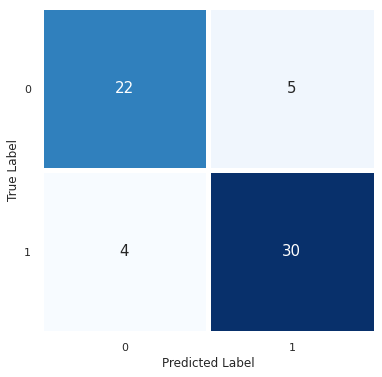

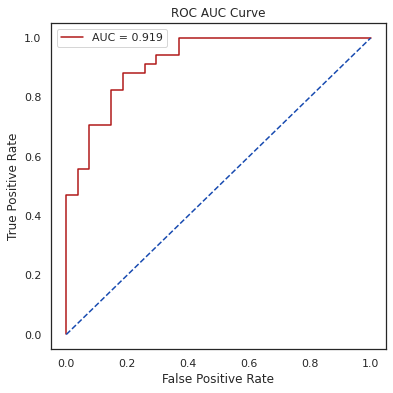

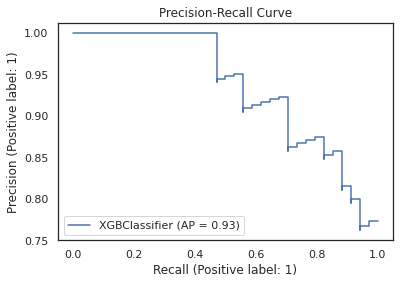

In [42]:
#Fitting XGBClassifier Model
classifier = XGBClassifier(eval_metric= 'error', learning_rate= 0.1)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
y_prob = classifier.predict_proba(x_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (6, 6))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.yticks(rotation = 0)
plt.show()

# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (6, 6))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC AUC Curve')
plt.legend()
plt.show()

#Precision Recall Curve
average_precision = average_precision_score(y_test, y_prob)
disp = plot_precision_recall_curve(classifier, x_test, y_test)
plt.title('Precision-Recall Curve')
plt.show()

## **LightGBM** <a id='5.18' ></a>

📌 *LightGBM is a gradient boosting framework that uses tree based learning algorithms. It is designed to be distributed and efficient with the following advantages: Faster training speed and higher efficiency, Lower memory usage, Better accuracy, Support of parallel and GPU learning, Capable of handling large-scale data.*

              precision    recall  f1-score   support

           0       0.82      0.85      0.84        27
           1       0.88      0.85      0.87        34

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

ROC AUC score: 0.9411764705882353
Accuracy Score:  0.8524590163934426


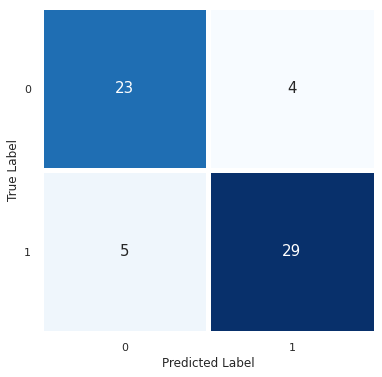

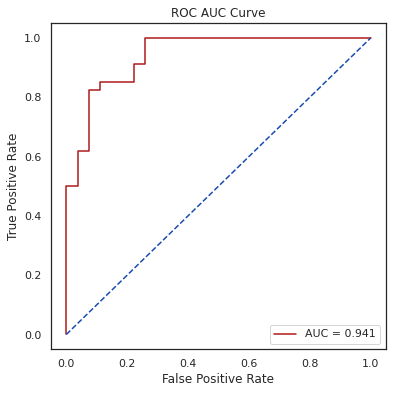

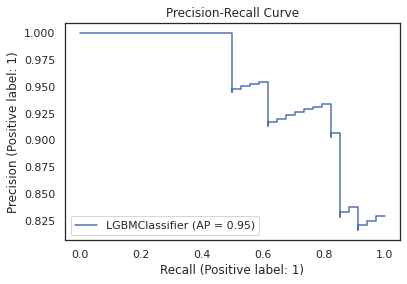

In [43]:
#Fitting LGBMClassifier Model
classifier = LGBMClassifier(learning_rate= 0.1, n_estimators= 100, random_state= 0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
y_prob = classifier.predict_proba(x_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (6, 6))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.yticks(rotation = 0)
plt.show()

# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (6, 6))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC AUC Curve')
plt.legend()
plt.show()

#Precision Recall Curve
average_precision = average_precision_score(y_test, y_prob)
disp = plot_precision_recall_curve(classifier, x_test, y_test)
plt.title('Precision-Recall Curve')
plt.show()

## **Linear Discriminant Analysis** <a id='5.19' ></a>

📌 *Linear Discriminant Analysis or LDA is a statistical technique for binary and multiclass classification. It too assumes a Gaussian distribution for the numerical input variables. You can construct an LDA model using the LinearDiscriminantAnalysis class.*

              precision    recall  f1-score   support

           0       0.88      0.78      0.82        27
           1       0.84      0.91      0.87        34

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61

ROC AUC score: 0.900871459694989
Accuracy Score:  0.8524590163934426


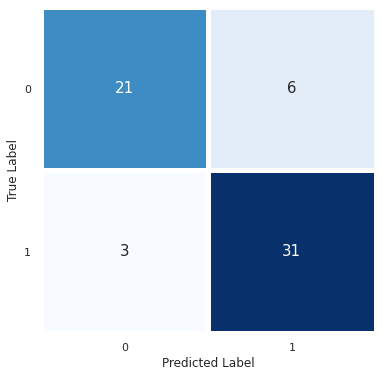

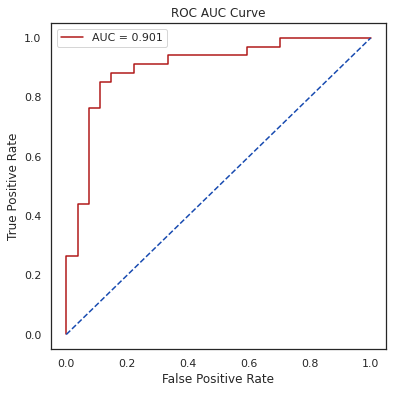

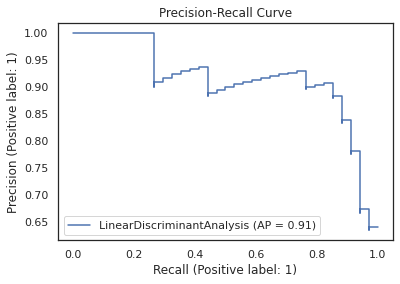

In [44]:
#Fitting LinearDiscriminantAnalysis Model
classifier = LinearDiscriminantAnalysis()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
y_prob = classifier.predict_proba(x_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (6, 6))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.yticks(rotation = 0)
plt.show()

# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (6, 6))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC AUC Curve')
plt.legend()
plt.show()

#Precision Recall Curve
average_precision = average_precision_score(y_test, y_prob)
disp = plot_precision_recall_curve(classifier, x_test, y_test)
plt.title('Precision-Recall Curve')
plt.show()

## **Quadratic Discriminant Analysis** <a id='5.20' ></a>

📌 *A classifier with a quadratic decision boundary, generated by fitting class conditional densities to the data and using Bayes’ rule. The model fits a Gaussian density to each class.*

              precision    recall  f1-score   support

           0       0.81      0.78      0.79        27
           1       0.83      0.85      0.84        34

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61

ROC AUC score: 0.8856209150326797
Accuracy Score:  0.819672131147541


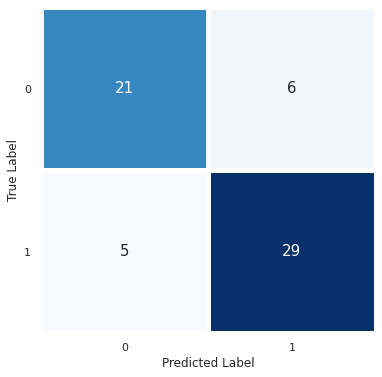

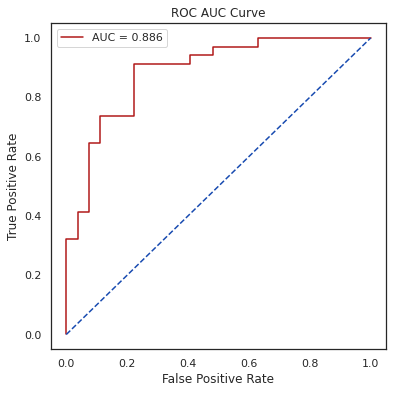

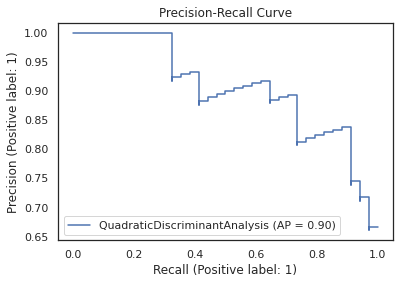

In [45]:
#Fitting QuadraticDiscriminantAnalysis Model
classifier = QuadraticDiscriminantAnalysis()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
y_prob = classifier.predict_proba(x_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (6, 6))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.yticks(rotation = 0)
plt.show()

# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (6, 6))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC AUC Curve')
plt.legend()
plt.show()

#Precision Recall Curve
average_precision = average_precision_score(y_test, y_prob)
disp = plot_precision_recall_curve(classifier, x_test, y_test)
plt.title('Precision-Recall Curve')
plt.show()

## **MLPClassifier** <a id='5.21' ></a>

📌 *MLPClassifier stands for Multi-layer Perceptron classifier which in the name itself connects to a Neural Network. Unlike other classification algorithms such as Support Vectors or Naive Bayes Classifier, MLPClassifier relies on an underlying Neural Network to perform the task of classification.*

              precision    recall  f1-score   support

           0       0.92      0.81      0.86        27
           1       0.86      0.94      0.90        34

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61

ROC AUC score: 0.9237472766884531
Accuracy Score:  0.8852459016393442


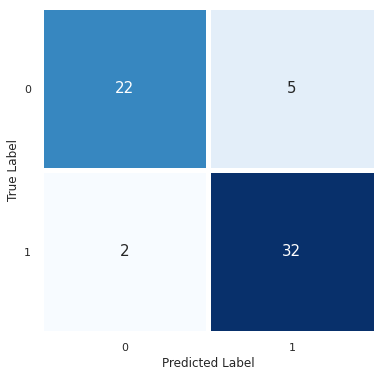

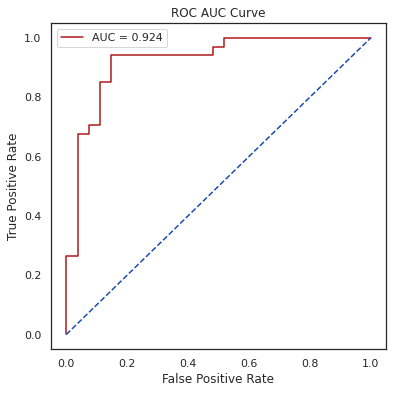

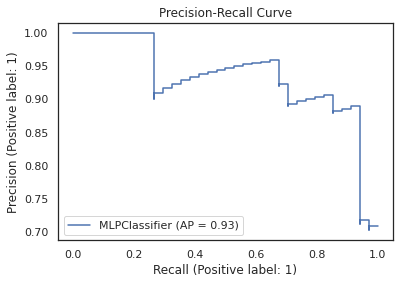

In [46]:
#Fitting MLPClassifier Model
classifier = MLPClassifier()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
y_prob = classifier.predict_proba(x_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (6, 6))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.yticks(rotation = 0)
plt.show()

# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (6, 6))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC AUC Curve')
plt.legend()
plt.show()

#Precision Recall Curve
average_precision = average_precision_score(y_test, y_prob)
disp = plot_precision_recall_curve(classifier, x_test, y_test)
plt.title('Precision-Recall Curve')
plt.show()

## **H2O AutoML** <a id='5.22' ></a>

📌 *The H2O AutoML interface is designed to have as few parameters as possible so that all the user needs to do is point to their dataset, identify the response column and optionally specify a time constraint or limit on the number of total models trained.* <br>
📌 *In both the R and Python API, AutoML uses the same data-related arguments, x, y, training_frame, validation_frame, as the other H2O algorithms. Most of the time, all you’ll need to do is specify the data arguments. You can then configure values for max_runtime_secs and/or max_models to set explicit time or number-of-model limits on your run.*

In [47]:
# Starting H2O
import h2o
from h2o.automl import H2OAutoML

h2o.init(nthreads = -1)

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.10" 2021-01-19; OpenJDK Runtime Environment (build 11.0.10+9-Ubuntu-0ubuntu1.18.04); OpenJDK 64-Bit Server VM (build 11.0.10+9-Ubuntu-0ubuntu1.18.04, mixed mode, sharing)
  Starting server from /opt/conda/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp7u39x0og
  JVM stdout: /tmp/tmp7u39x0og/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp7u39x0og/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.1
H2O_cluster_version_age:,"2 years, 8 months and 9 days !!!"
H2O_cluster_name:,H2O_from_python_unknownUser_d1xnl8
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,7.840 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"accepting new members, healthy"


In [48]:
# Import Dataset
dataset = h2o.import_file('/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv')

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [49]:
dataset

age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
44,1,1,120,263,0,1,173,0,0,2,0,3,1
52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [50]:
# Identify predictors and response
x = dataset.columns
y = "output"
x.remove(y)

dataset[y] = dataset[y].asfactor()

# Run AutoML for 20 base models (limited to 1 hour max runtime by default)
aml = H2OAutoML(max_models=20, seed=11)
aml.train(x=x, y=y, training_frame=dataset)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [51]:
lb = aml.leaderboard
lb.head()

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
XGBoost_1_AutoML_20231205_153246,0.902372,0.393927,0.912883,0.181291,0.355306,0.126242
StackedEnsemble_BestOfFamily_AutoML_20231205_153246,0.897936,0.404037,0.894262,0.184914,0.356664,0.127209
XGBoost_grid__1_AutoML_20231205_153246_model_4,0.89787,0.393807,0.896465,0.182477,0.353955,0.125284
GBM_grid__1_AutoML_20231205_153246_model_1,0.897189,0.404382,0.908012,0.213307,0.361364,0.130584
XGBoost_grid__1_AutoML_20231205_153246_model_1,0.896904,0.397814,0.877224,0.185507,0.354688,0.125803
GBM_4_AutoML_20231205_153246,0.895828,0.409751,0.904287,0.186759,0.363352,0.132025
XGBoost_grid__1_AutoML_20231205_153246_model_3,0.894159,0.426988,0.895791,0.177668,0.365767,0.133786
XGBoost_2_AutoML_20231205_153246,0.8935,0.40626,0.898338,0.178327,0.360276,0.129799
GLM_1_AutoML_20231205_153246,0.892446,0.402469,0.900527,0.174045,0.358261,0.128351
XGBoost_3_AutoML_20231205_153246,0.891304,0.433844,0.894682,0.190382,0.369935,0.136852


In [52]:
#Best Model
aml.leader 

Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_1_AutoML_20231205_153246


Model Summary: 


,,number_of_trees
0,,34.0




ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.07635511858044414
RMSE: 0.2763242996561181
LogLoss: 0.25680720162611714
Mean Per-Class Error: 0.09196310935441376
AUC: 0.9634606938954766
AUCPR: 0.967869502323229
Gini: 0.9269213877909532

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.551515519618988: 


,,0,1,Error,Rate
0,0,125.0,13.0,0.0942,(13.0/138.0)
1,1,15.0,150.0,0.0909,(15.0/165.0)
2,Total,140.0,163.0,0.0924,(28.0/303.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.551516,0.914634,157.0
1,max f2,0.304208,0.939323,191.0
2,max f0point5,0.699781,0.927694,136.0
3,max accuracy,0.569020,0.907591,155.0
4,max precision,0.993495,1.000000,0.0
5,max recall,0.109734,1.000000,220.0
6,max specificity,0.993495,1.000000,0.0
7,max absolute_mcc,0.569020,0.814430,155.0
8,max min_per_class_accuracy,0.551516,0.905797,157.0
9,max mean_per_class_accuracy,0.569020,0.908037,155.0



Gains/Lift Table: Avg response rate: 54.46 %, avg score: 53.97 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.013201,0.991255,1.836364,1.836364,1.000000,0.992778,1.000000,0.992778,0.024242,0.024242,83.636364,83.636364,0.024242
1,2,0.023102,0.990286,1.836364,1.836364,1.000000,0.990643,1.000000,0.991863,0.018182,0.042424,83.636364,83.636364,0.042424
2,3,0.033003,0.988013,1.836364,1.836364,1.000000,0.989135,1.000000,0.991045,0.018182,0.060606,83.636364,83.636364,0.060606
3,4,0.042904,0.986743,1.836364,1.836364,1.000000,0.987458,1.000000,0.990217,0.018182,0.078788,83.636364,83.636364,0.078788
4,5,0.052805,0.985449,1.836364,1.836364,1.000000,0.986203,1.000000,0.989464,0.018182,0.096970,83.636364,83.636364,0.096970
5,6,0.102310,0.978646,1.836364,1.836364,1.000000,0.981442,1.000000,0.985582,0.090909,0.187879,83.636364,83.636364,0.187879
6,7,0.151815,0.961253,1.836364,1.836364,1.000000,0.972069,1.000000,0.981176,0.090909,0.278788,83.636364,83.636364,0.278788
7,8,0.201320,0.943944,1.713939,1.806259,0.933333,0.953378,0.983607,0.974340,0.084848,0.363636,71.393939,80.625931,0.356390
8,9,0.300330,0.885908,1.775152,1.796004,0.966667,0.918277,0.978022,0.955858,0.175758,0.539394,77.515152,79.600400,0.524901
9,10,0.399340,0.784540,1.775152,1.790834,0.966667,0.843786,0.975207,0.928072,0.175758,0.715152,77.515152,79.083396,0.693412




ModelMetricsBinomial: xgboost
** Reported on cross-validation data. **

MSE: 0.12624206349276584
RMSE: 0.35530559169926645
LogLoss: 0.39392716091197827
Mean Per-Class Error: 0.17048748353096177
AUC: 0.9023715415019763
AUCPR: 0.9128831385055152
Gini: 0.8047430830039526

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3853444457054138: 


,,0,1,Error,Rate
0,0,98.0,40.0,0.2899,(40.0/138.0)
1,1,12.0,153.0,0.0727,(12.0/165.0)
2,Total,110.0,193.0,0.1716,(52.0/303.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.385344,0.854749,190.0
1,max f2,0.238779,0.915899,205.0
2,max f0point5,0.781277,0.849624,122.0
3,max accuracy,0.444586,0.834983,176.0
4,max precision,0.995587,1.000000,0.0
5,max recall,0.033356,1.000000,265.0
6,max specificity,0.995587,1.000000,0.0
7,max absolute_mcc,0.444586,0.667492,176.0
8,max min_per_class_accuracy,0.644335,0.793939,155.0
9,max mean_per_class_accuracy,0.444586,0.829513,176.0



Gains/Lift Table: Avg response rate: 54.46 %, avg score: 55.62 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.013201,0.991067,1.836364,1.836364,1.000000,0.993062,1.000000,0.993062,0.024242,0.024242,83.636364,83.636364,0.024242
1,2,0.023102,0.989178,1.836364,1.836364,1.000000,0.989600,1.000000,0.991578,0.018182,0.042424,83.636364,83.636364,0.042424
2,3,0.033003,0.988419,1.836364,1.836364,1.000000,0.988647,1.000000,0.990699,0.018182,0.060606,83.636364,83.636364,0.060606
3,4,0.042904,0.987552,1.836364,1.836364,1.000000,0.987665,1.000000,0.989999,0.018182,0.078788,83.636364,83.636364,0.078788
4,5,0.052805,0.986350,1.836364,1.836364,1.000000,0.986805,1.000000,0.989400,0.018182,0.096970,83.636364,83.636364,0.096970
5,6,0.102310,0.978079,1.713939,1.777126,0.933333,0.982965,0.967742,0.986286,0.084848,0.181818,71.393939,77.712610,0.174572
6,7,0.151815,0.966797,1.836364,1.796443,1.000000,0.971288,0.978261,0.981395,0.090909,0.272727,83.636364,79.644269,0.265481
7,8,0.201320,0.950387,1.713939,1.776155,0.933333,0.960764,0.967213,0.976322,0.084848,0.357576,71.393939,77.615499,0.343083
8,9,0.300330,0.894339,1.652727,1.735465,0.900000,0.929040,0.945055,0.960735,0.163636,0.521212,65.272727,73.546454,0.484980
9,10,0.399340,0.790730,1.407879,1.654245,0.766667,0.858215,0.900826,0.935317,0.139394,0.660606,40.787879,65.424493,0.573650




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.848306,0.030940376,0.86885244,0.8360656,0.8032787,0.85,0.8833333
1,auc,0.9047699,0.023288706,0.91450214,0.88203466,0.87770563,0.9281706,0.9214366
2,aucpr,0.91969085,0.021157363,0.9098854,0.8981824,0.90556866,0.9421579,0.94265974
3,err,0.15169398,0.030940376,0.13114753,0.16393442,0.19672132,0.15,0.11666667
4,err_count,9.2,1.9235384,8.0,10.0,12.0,9.0,7.0
5,f0point5,0.8357004,0.035612617,0.8787879,0.8121827,0.7936508,0.82901555,0.8648649
6,f1,0.8710214,0.024871524,0.8787879,0.8648649,0.8333333,0.8767123,0.90140843
7,f2,0.9104491,0.030213833,0.8787879,0.9248555,0.877193,0.9302326,0.9411765
8,lift_top_group,1.8363637,0.016597653,1.8484849,1.8484849,1.8484849,1.8181819,1.8181819
9,logloss,0.39359713,0.06537667,0.37908992,0.4023688,0.49933267,0.3258626,0.36133164



See the whole table with table.as_data_frame()

Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2023-12-05 15:32:49,2.682 sec,0.0,0.500000,0.693147,0.500000,0.544554,1.000000,0.455446
1,,2023-12-05 15:32:49,2.718 sec,5.0,0.357054,0.420134,0.929798,0.938318,1.836364,0.141914
2,,2023-12-05 15:32:49,2.746 sec,10.0,0.314424,0.332162,0.943895,0.948450,1.836364,0.118812
3,,2023-12-05 15:32:49,2.780 sec,15.0,0.295980,0.297647,0.954743,0.959742,1.836364,0.089109
4,,2023-12-05 15:32:49,2.811 sec,20.0,0.288296,0.281481,0.959245,0.965325,1.836364,0.102310
5,,2023-12-05 15:32:49,2.846 sec,25.0,0.280426,0.267978,0.962802,0.967859,1.836364,0.089109
6,,2023-12-05 15:32:49,2.887 sec,30.0,0.278757,0.261815,0.962451,0.967685,1.836364,0.089109
7,,2023-12-05 15:32:49,2.916 sec,34.0,0.276324,0.256807,0.963461,0.967870,1.836364,0.092409



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,cp,101.339546,1.000000,0.252629
1,oldpeak,58.656330,0.578810,0.146224
2,thall,57.993664,0.572271,0.144572
3,caa,56.997894,0.562445,0.142090
4,age,25.616711,0.252781,0.063860
5,thalachh,24.490623,0.241669,0.061053
6,sex,18.845175,0.185961,0.046979
7,chol,16.410301,0.161934,0.040909
8,slp,13.968411,0.137838,0.034822
9,trtbps,13.450188,0.132724,0.033530


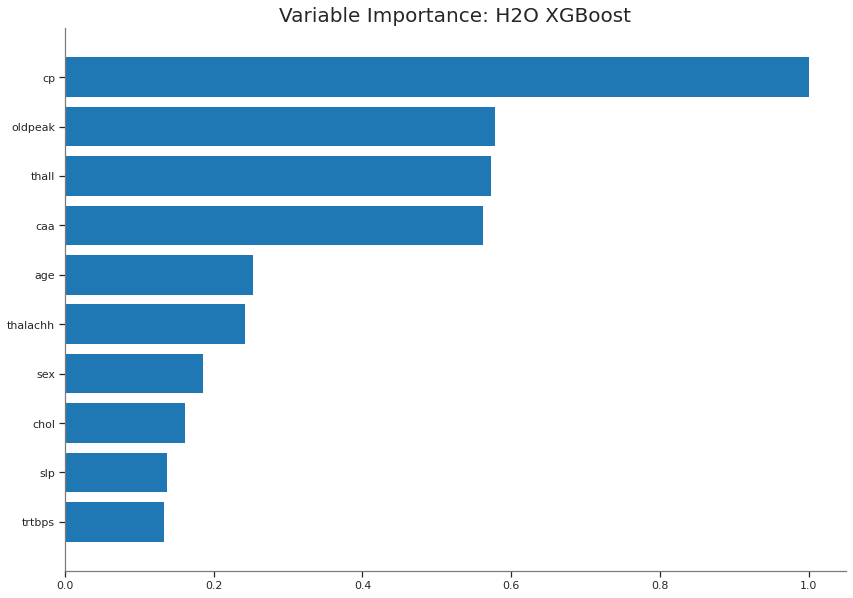

In [53]:
# Variable Importance Plot
aml.leader.varimp_plot()

📌 Variable Importance shows the relative importance of the most important variables in the model. H2O displays each feature’s importance after scaling between 0 and 1. <br>
📌 It is straightforward to interpret this graph. Variable with the longest bar (aka the topmost one) is the most important and the one with the shortest bar (aka the bottom-most one) is the least important.

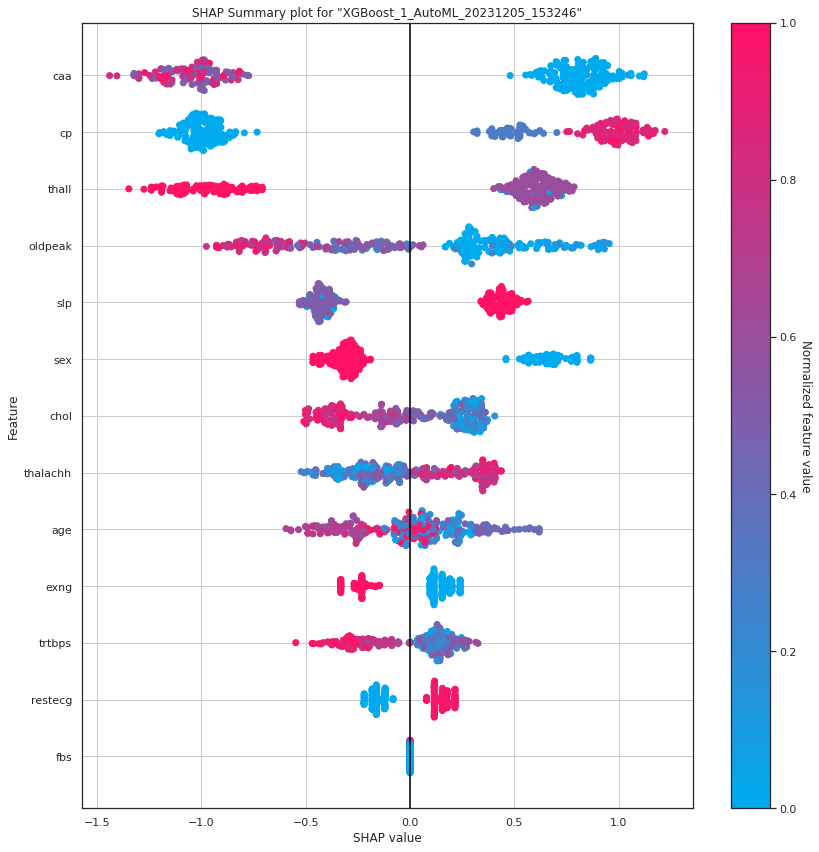

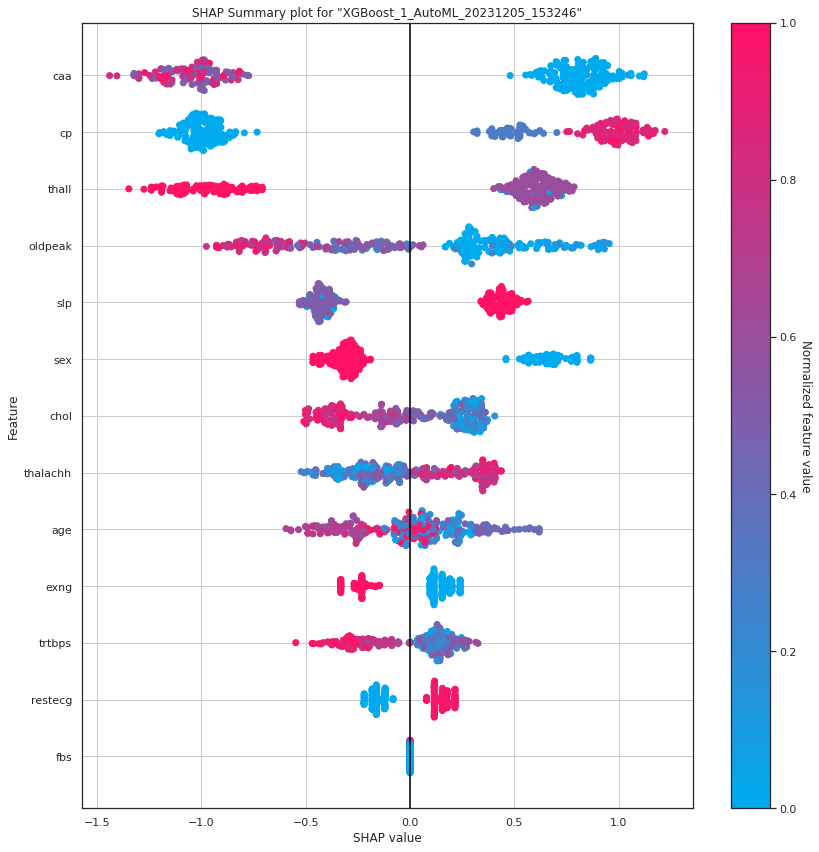

In [54]:
# SHAP Summary Plot
aml.leader.shap_summary_plot(dataset)

📌 SHAP value which is an acronym for **SHapley Additive exPlanations** interprets the impact of having a particular value for a given variable compared to the prediction we would make if that variable took some baseline value instead. <br>
📌 The y-axis indicates the variable name, usually in the descending order of importance from top to bottom. <br>
📌 SHAP value on the x-axis indicates the change in log-odds. From this value, we can extract the probability of an event (*Condition* in this case). <br>
📌 Gradient color indicates the original value for that variable. In binary classification problems(as in our case), it will take two colors, but it can contain the whole spectrum for numeric target variables(regression problems). <br>
📌 Each point in the plot represents a record from the original dataset.

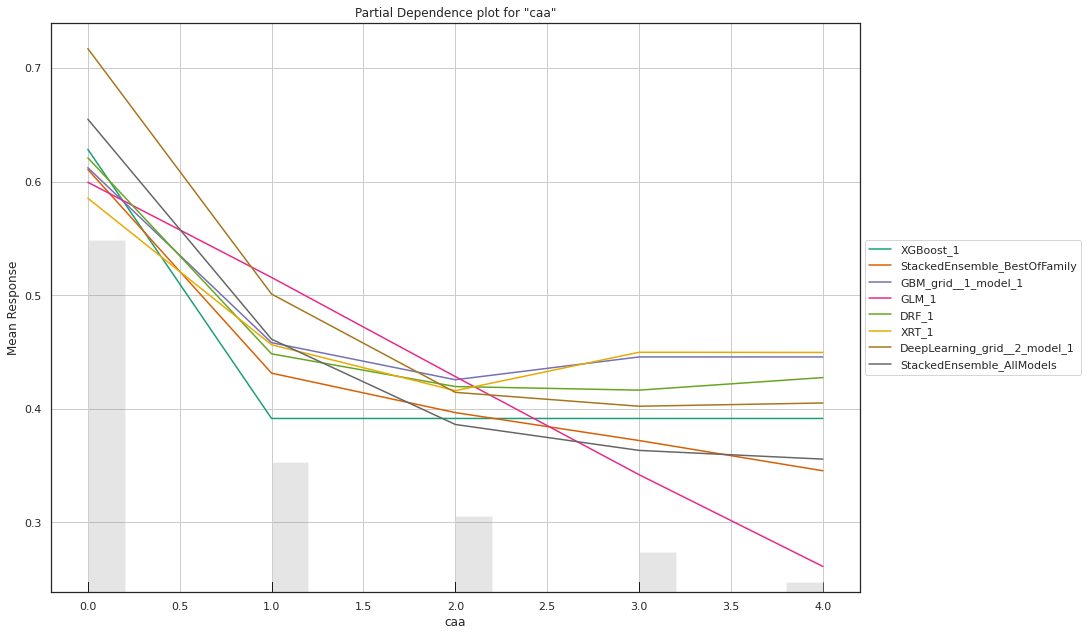

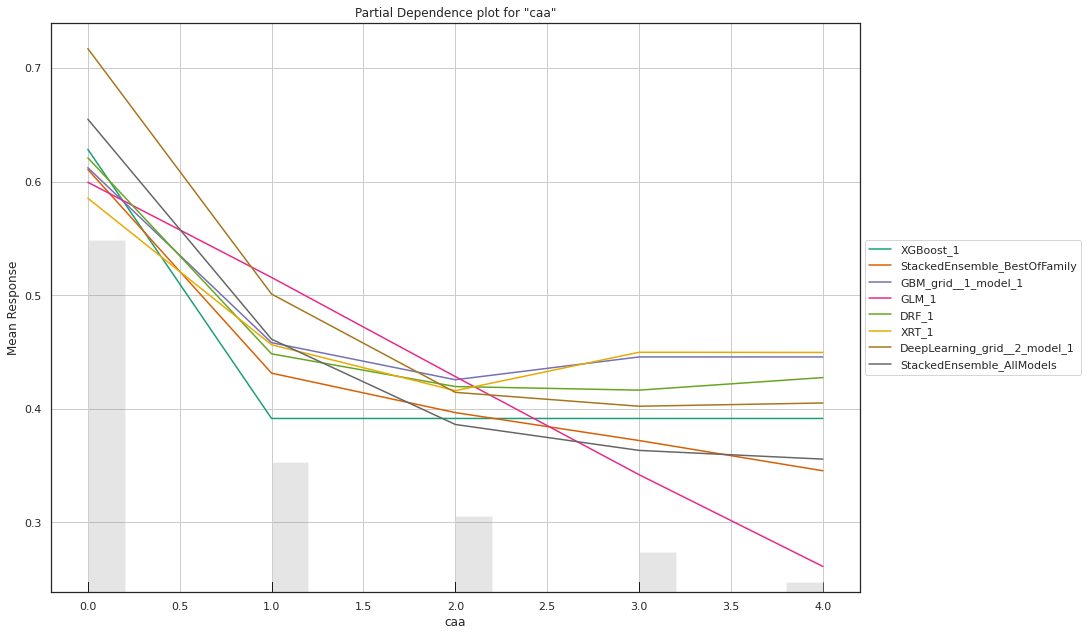

In [55]:
# Partial Dependence Plot
aml.pd_multi_plot(dataset, column='caa')

📌 Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. <br>
📌 The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

## **TPOT** <a id='5.23' ></a>

📌 *TPOT is meant to be an assistant that gives you ideas on how to solve a particular machine learning problem by exploring pipeline configurations that you might have never considered, then leaves the fine-tuning to more constrained parameter tuning techniques such as grid search.*

In [56]:
from tpot import TPOTClassifier

tpot = TPOTClassifier(generations=5, verbosity=2)
tpot.fit(x_train,y_train)

Version 0.11.7 of tpot is outdated. Version 0.12.1 was released Tuesday August 15, 2023.


Optimization Progress:   0%|          | 0/600 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8475340136054422

Generation 2 - Current best internal CV score: 0.8475340136054422

Generation 3 - Current best internal CV score: 0.8556972789115646

Generation 4 - Current best internal CV score: 0.8556972789115646

Generation 5 - Current best internal CV score: 0.8556972789115646

Best pipeline: KNeighborsClassifier(MaxAbsScaler(SelectFwe(OneHotEncoder(input_matrix, minimum_fraction=0.25, sparse=False, threshold=10), alpha=0.031)), n_neighbors=24, p=2, weights=uniform)


TPOTClassifier(generations=5, verbosity=2)

              precision    recall  f1-score   support

           0       0.84      0.78      0.81        27
           1       0.83      0.88      0.86        34

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61

ROC AUC score: 0.9291938997821351
Accuracy Score:  0.8360655737704918


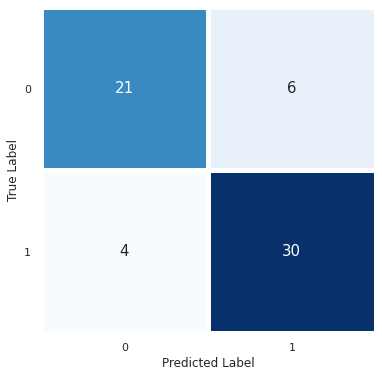

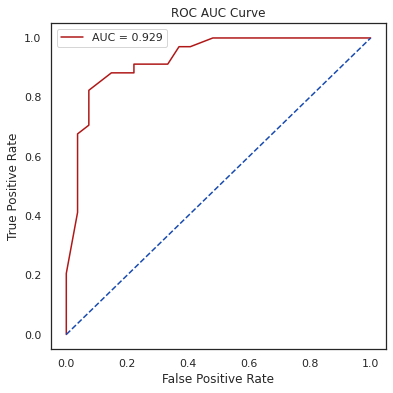

In [57]:
y_pred = tpot.predict(x_test)
y_prob = tpot.predict_proba(x_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (6, 6))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.yticks(rotation = 0)
plt.show()

# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (6, 6))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC AUC Curve')
plt.legend()
plt.show()

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:LightSlateGray;
           font-size:150%;
           text-align:center;
            letter-spacing:0.5px"> <a id='6'></a>
    
    Conclusion
</div>

📌 After extensive data analysis and I tried different classification models to see how it performs on the dataset. I got pretty good results with classification report. <br>
📌 Also, I plotted ROC and Precision-Recall Curve for classification models also Variable Importance, SHAP Summary and Partial Dependenced Plot for H2O AutoML. <br>
📌 Note that all models are used with default parameters, we can also tune the models and see how they perform.

<div style="color:black;
           display:fill;
           border-radius:5px;
           border:2px solid DodgerBlue;
           background-color:white;
           font-size:150%;
           text-align:center;
           letter-spacing:0.5px">
    
    Thank You!
</div>